___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


# PART- 2 ( Handling Missing Values )

In [1]:
# Libraries
import numpy as np
import pandas as pd
from scipy import misc
import scipy

# Display options
# pd.set_option('display.max_rows', 3000)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_info_rows', 3000)
# pd.set_option('display.max_info_columns', 500)
# pd.set_option('display.max_colwidth', 500)
# pd.set_option('display.expand_frame_repr', True)
# pd.set_option('display.width', 3000)

# # Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore') 
warnings.warn("this will not show")

# # SQL
# import pyodbc
# import pandas.io.sql

# # Datetime
from datetime import datetime
now = datetime.now() # current date and time

In [2]:
# DAwPy_Capstone(AutoScout)_Project_BestOfTheBest_Part_1 süreci sonunda oluşturulan csv nin okutulması

In [3]:
df0 = pd.read_csv('autoscoutpart_1.csv')

In [4]:
# Column isimlerinin çalışmayı kolaylaştırmak maksadıyla stansart hale getirilmesi

In [5]:
df0.columns = [x.lower().strip().replace('&', '_').replace( ' ', '_') for x in df0.columns]

In [6]:
df0.head(1)

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,inspection_new,body_color,...,vehicle_condition,next_inspection_year,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,cons_comb_l/100_km,cons_city_l/100_km,cons_country_l/100_km
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.000,2016.000,2.000,Yes,Black,...,Used,2021.000,NaN,Cloth,Black,1422.000,1220.000,3.800,4.300,3.500


In [7]:
# Çalışma df nin df0 dan kopyalanarak oluşturulması

In [8]:
df = df0.copy()

In [9]:
# Column isimlerinin değiştirilmesi için alternatif kod çalışmaları

# df.columns = df.columns.str.lower()
# df.columns = [x.strip().replace('&', '_') for x in df.columns]
# df.columns = [x.strip().replace( ' ', '_') for x in df.columns]

# df.columns = [x.lower().strip().replace('&', '_').replace( ' ', '_') for x in df.columns]

# df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [10]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
registration,2016.000,2017.000,2016.000
prev_owner,2.000,NaN,1.000
inspection_new,Yes,NaN,NaN
body_color,Black,Red,Black


In [11]:
df.tail(1)

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,inspection_new,body_color,...,vehicle_condition,next_inspection_year,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,cons_comb_l/100_km,cons_city_l/100_km,cons_country_l/100_km
15918,Renault Espace,INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX,Van,40999,VAT deductible,NaN,2019.000,1.000,Yes,Grey,...,Demonstration,NaN,NaN,Full leather,Brown,1798.000,1685.000,6.800,8.700,5.700


In [12]:
df.sample(5)

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,inspection_new,body_color,...,vehicle_condition,next_inspection_year,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,cons_comb_l/100_km,cons_city_l/100_km,cons_country_l/100_km
5485,Audi A3,Sportback Sport 1.0 TSI 6-Gang Navi,Sedans,23980,VAT deductible,6000.000,2019.000,1.000,Yes,Silver,...,Demonstration,NaN,24.000,Cloth,Black,999.000,NaN,5.100,6.000,4.600
1445,Audi A1,"1.0 TFSi admired & active style Paket *159,-€",Compact,15975,VAT deductible,9371.000,2017.000,1.000,Yes,Black,...,Used,2021.000,NaN,Cloth,Black,999.000,NaN,NaN,NaN,NaN
13035,Opel Insignia,"GS 2,0 CDTI BlueInjection Innovation St./St. Aut.",Sedans,39990,VAT deductible,5555.000,2019.000,NaN,NaN,Black,...,Demonstration,2022.000,NaN,Cloth,Cloth,1956.000,NaN,5.500,7.100,4.600
10324,Opel Corsa,1.2 Selection Klima,Compact,9990,VAT deductible,10.000,2019.000,NaN,Yes,Blue,...,Pre-registered,2021.000,NaN,Cloth,Black,1229.000,1135.000,5.600,7.300,4.700
615,Audi A1,Sportback 1.0TFSI Klima Einparkh Berganfahr Servo,Sedans,13470,NaN,51300.000,2016.000,1.000,NaN,Blue,...,Used,2021.000,NaN,Cloth,Black,999.000,NaN,4.200,5.000,3.700


In [13]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'vat', 'km',
       'registration', 'prev_owner', 'inspection_new', 'body_color',
       'paint_type', 'body_color_original', 'nr._of_doors', 'nr._of_seats',
       'model_code', 'gearing_type', 'cylinders', 'drive_chain', 'fuel',
       'co2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'emission_label',
       'gears', 'age', 'hp_kw', 'vehicle_condition', 'next_inspection_year',
       'warranty_month', 'upholstery_type', 'upholstery_color',
       'displacement_cc', 'weight_kg', 'cons_comb_l/100_km',
       'cons_city_l/100_km', 'cons_country_l/100_km'],
      dtype='object')

In [14]:
df.shape

(15919, 39)

In [15]:
df.size

620841

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15919.000,18019.897,7386.169,13.000,12850.000,16900.000,21900.000,74600.000
km,14895.000,34130.128,37352.978,0.000,5153.000,22740.000,49371.500,317000.000
registration,14322.000,2017.458,1.077,2016.000,2016.000,2018.000,2018.000,2019.000
prev_owner,9254.000,1.071,0.326,0.000,1.000,1.000,1.000,4.000
nr._of_doors,15707.000,4.656,0.645,1.000,4.000,5.000,5.000,7.000
nr._of_seats,14942.000,4.950,0.490,2.000,5.000,5.000,5.000,7.000
cylinders,10239.000,3.797,0.415,1.000,4.000,4.000,4.000,8.000
co2_emission,13483.000,109.291,36.193,0.000,103.000,114.000,128.000,990.000
emission_label,3945.000,3.711,0.889,1.000,4.000,4.000,4.000,5.000
gears,11207.000,5.925,0.848,1.000,5.000,6.000,6.000,50.000


In [17]:
df.describe(include = object).T

,count,unique,top,freq
make_model,15919,9,Audi A3,3097
short_description,15873,10001,SPB 1.6 TDI 116 CV S tronic Sport,64
body_type,15859,9,Sedans,7903
vat,11406,2,VAT deductible,10980
inspection_new,3932,1,Yes,3932
body_color,15322,14,Black,3745
paint_type,10147,3,Metallic,9794
body_color_original,12145,1926,Onyx Schwarz,338
model_code,15919,277,0588/AYB,1467
gearing_type,15919,3,Manual,8153


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             15919 non-null  object 
 1   short_description      15873 non-null  object 
 2   body_type              15859 non-null  object 
 3   price                  15919 non-null  int64  
 4   vat                    11406 non-null  object 
 5   km                     14895 non-null  float64
 6   registration           14322 non-null  float64
 7   prev_owner             9254 non-null   float64
 8   inspection_new         3932 non-null   object 
 9   body_color             15322 non-null  object 
 10  paint_type             10147 non-null  object 
 11  body_color_original    12145 non-null  object 
 12  nr._of_doors           15707 non-null  float64
 13  nr._of_seats           14942 non-null  float64
 14  model_code             15919 non-null  object 
 15  ge

In [19]:
dtypes = pd.DataFrame(df.dtypes, columns = ['dtypes'])
dtypes

,dtypes
make_model,object
short_description,object
body_type,object
price,int64
vat,object
km,float64
registration,float64
prev_owner,float64
inspection_new,object
body_color,object


In [20]:
notnull = pd.DataFrame(df.notnull().sum(), columns = ['notnull'])
notnull

,notnull
make_model,15919
short_description,15873
body_type,15859
price,15919
vat,11406
km,14895
registration,14322
prev_owner,9254
inspection_new,3932
body_color,15322


In [21]:
isnull = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])
isnull

,isnull
make_model,0
short_description,46
body_type,60
price,0
vat,4513
km,1024
registration,1597
prev_owner,6665
inspection_new,11987
body_color,597


In [22]:
null_percentage = round(pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['null_percentage']))

In [23]:
df_summary = pd.concat([dtypes, notnull, isnull, null_percentage], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
df_summary

,Columns,dtypes,notnull,isnull,null_percentage
0,make_model,object,15919,0,0.000
1,short_description,object,15873,46,0.000
2,body_type,object,15859,60,0.000
3,price,int64,15919,0,0.000
4,vat,object,11406,4513,28.000
5,km,float64,14895,1024,6.000
6,registration,float64,14322,1597,10.000
7,prev_owner,float64,9254,6665,42.000
8,inspection_new,object,3932,11987,75.000
9,body_color,object,15322,597,4.000


In [24]:
# Missing value olan column bilgileri

In [25]:
miss_val = []

[miss_val.append(i) for i in df.columns if any(df[i].isnull())]

miss_val

['short_description',
 'body_type',
 'vat',
 'km',
 'registration',
 'prev_owner',
 'inspection_new',
 'body_color',
 'paint_type',
 'body_color_original',
 'nr._of_doors',
 'nr._of_seats',
 'cylinders',
 'drive_chain',
 'co2_emission',
 'emission_class',
 'comfort_convenience',
 'entertainment_media',
 'extras',
 'safety_security',
 'emission_label',
 'gears',
 'age',
 'hp_kw',
 'vehicle_condition',
 'next_inspection_year',
 'warranty_month',
 'upholstery_type',
 'upholstery_color',
 'displacement_cc',
 'weight_kg',
 'cons_comb_l/100_km',
 'cons_city_l/100_km',
 'cons_country_l/100_km']

# function for first looking to the columns

In [26]:
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

# functions to fill the missing values

In [27]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [28]:
def fill_prop(df, group_col, col_name):
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [29]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

# COLUMN-29 vehicle_condition (DONE)

In [30]:
first_looking('vehicle_condition')

column name    :  vehicle_condition
--------------------------------
per_of_nulls   :  % 0.01
num_of_nulls   :  2
num_of_uniques :  5
Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: vehicle_condition, dtype: int64


In [31]:
df['vehicle_condition'].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: vehicle_condition, dtype: int64

In [32]:
df['vehicle_condition'].isnull().sum()

2

In [33]:
# Cross check for NULL values in the vehicle_condition column with other columns

df[(df['vehicle_condition'].isnull())][['vehicle_condition', 'model_code', 'age', 'registration', 'prev_owner', 'km', 'price', 'make_model']]

,vehicle_condition,model_code,age,registration,prev_owner,km,price,make_model
2765,NaN,0588/AWJ,3.000,2016.000,NaN,115137.000,17900,Audi A3
5237,NaN,0588/AYB,NaN,NaN,NaN,NaN,25400,Audi A3


In [34]:
# Changing the vehicle_condition of the vehicle with the vehicle_condition column to NULL and age = 3, 
# registration = 2016 and km = 115137 to Used

df.loc[(df['vehicle_condition'].isnull()) & (df['age'] == 3), 'vehicle_condition'] = 'Used'

In [35]:
df['vehicle_condition'].value_counts(dropna=False)

Used              11097
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   1
Name: vehicle_condition, dtype: int64

In [36]:
# Cross-checking the only remaining NULL value in the vehicle_condition column with other columns

df[(df['make_model'] == 'Audi A3') & (df['price'] == 25400)][['make_model', 'price', 'registration', 'vehicle_condition', 'km', 'age', 'prev_owner', 'inspection_new', 'warranty_month']]

,make_model,price,registration,vehicle_condition,km,age,prev_owner,inspection_new,warranty_month
3350,Audi A3,25400,2017.000,Used,17000.000,2.000,1.000,NaN,12.000
5237,Audi A3,25400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5238,Audi A3,25400,2019.000,Pre-registered,60.000,0.000,NaN,NaN,NaN
5239,Audi A3,25400,2019.000,Pre-registered,1.000,0.000,NaN,NaN,24.000
5240,Audi A3,25400,2019.000,Pre-registered,10.000,0.000,1.000,NaN,NaN
5668,Audi A3,25400,NaN,New,0.000,NaN,0.000,NaN,24.000
5671,Audi A3,25400,NaN,New,NaN,NaN,NaN,NaN,NaN
5672,Audi A3,25400,NaN,New,0.000,NaN,0.000,NaN,24.000
5673,Audi A3,25400,2019.000,Pre-registered,10.000,0.000,NaN,NaN,NaN
5674,Audi A3,25400,NaN,New,NaN,NaN,NaN,NaN,NaN


In [37]:
# Changing the vehicle_condition column of the vehicle whose vehicle_condition column is NULL to Used

df.loc[(df['vehicle_condition'].isnull()) & (df['price'] == 25400), 'vehicle_condition'] = 'New'

In [38]:
df['vehicle_condition'].value_counts(dropna=False)

Used              11097
New                1651
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: vehicle_condition, dtype: int64

In [39]:
df.groupby('vehicle_condition')['km'].describe()

,count,mean,std,min,25%,50%,75%,max
vehicle_condition,,,,,,,,
Demonstration,763.000,5099.474,7407.774,3.000,521.500,3000.000,6000.000,78000.000
Employee's car,1003.000,20021.291,14753.293,1.000,9442.500,20000.000,27152.500,112789.000
New,801.000,17.079,94.957,0.000,5.000,10.000,10.000,2500.000
Pre-registered,1246.000,149.254,949.017,1.000,9.000,10.000,25.000,15378.000
Used,11082.000,43692.145,38345.100,1.000,15900.000,29900.000,63900.000,317000.000


In [510]:
# BU KISIM AGE SÜTUNU TAMAMLANINCA ÇALIŞTIRILACAK

# Yukarıdaki tabloya dayanılarak;
# Pre_registered --> New
# Employee's car --> Used
# Demonstration --> Used olarak değiştirildi.

# df.loc[(df['vehicle_condition'] == 'Pre-registered'), 'vehicle_condition'] = 'New'
# df.loc[(df['vehicle_condition'] == "Employee's car"), 'vehicle_condition'] = 'Used'
# df.loc[(df['vehicle_condition'] == 'Demonstration'), 'vehicle_condition'] = 'Used'

In [511]:
df['vehicle_condition'].value_counts(dropna=False)

Used    12904
New      3015
Name: vehicle_condition, dtype: int64

# COLUMN-27 age (DONE)

In [42]:
first_looking('age')

column name    :  age
--------------------------------
per_of_nulls   :  % 10.03
num_of_nulls   :  1597
num_of_uniques :  4
1.000    4522
3.000    3674
2.000    3273
0.000    2853
NaN      1597
Name: age, dtype: int64


In [43]:
df['age'].value_counts(dropna=False)

1.000    4522
3.000    3674
2.000    3273
0.000    2853
NaN      1597
Name: age, dtype: int64

In [44]:
df['age'].isnull().sum()

1597

In [45]:
df['age'].fillna('-unknown', inplace=True)

In [46]:
# Checking the NOTNULL values in the age column from the registration column

df[(df['registration'].isnull()) & (df['age'].notnull())].value_counts().sum()

0

In [47]:
df[(df['registration'].notnull()) & (df['age'] == '-unknown')].value_counts().sum()

0

In [48]:
# Cross check for NULL values in the age column with other columns

df[(df['age'] == '-unknown')][['age', 'registration', 'prev_owner', 'vehicle_condition', 'km', 'price']].sample(20)

,age,registration,prev_owner,vehicle_condition,km,price
8002,-unknown,NaN,NaN,New,1.000,17015
2610,-unknown,NaN,NaN,New,10.000,21789
12906,-unknown,NaN,NaN,New,NaN,32799
14550,-unknown,NaN,NaN,New,1.000,10506
14139,-unknown,NaN,NaN,New,1.000,9972
8005,-unknown,NaN,NaN,New,NaN,16873
1973,-unknown,NaN,NaN,New,NaN,27800
15829,-unknown,NaN,NaN,New,NaN,50170
14878,-unknown,NaN,NaN,New,NaN,10946
13036,-unknown,NaN,NaN,New,NaN,39990


In [49]:
# describe yerine daha sade olarak kullanılabilir.
# unknown araçların km ve fiyat değerlerinin age=0 araçlar ile örtüştüğü görülmektedir.

# df.groupby(['make_model', 'age']).agg({'km': ['mean', 'min', 'max'], 'price': ['mean', 'min', 'max']})

df.groupby(['make_model', 'age']).agg({'km': ['mean'], 'price': ['mean']})

km     price
                             mean      mean
make_model     age                         
Audi A1        0.0       2494.501 24267.431
               1.0      13785.853 18454.753
               2.0      25821.713 16625.734
               3.0      54332.286 14489.769
               -unknown   705.505 23203.712
Audi A2        1.0      26166.000 28200.000
Audi A3        0.0       2126.757 25392.890
               1.0      18410.524 22504.332
               2.0      43853.141 19939.557
               3.0      90092.983 16466.090
               -unknown     9.663 24134.805
Opel Astra     0.0       2915.672 21653.819
               1.0      21442.709 16134.623
               2.0      49981.779 13008.951
               3.0      89134.266 11354.796
               -unknown  1441.981 20536.665
Opel Corsa     0.0       1079.617 13491.724
               1.0      17426.714 11308.958
               2.0      39977.979  9260.641
               3.0      62904.030  8199.182
               -unknown  2327.889 13190.269
Opel Insignia  0.0       3483.250 33794.902
               1.0      22193.802 21354.158
               2.0      47732.104 16995.141
               3.0      93187.986 13609.578
               -unknown   793.190 30586.794
Renault Clio   0.0        727.283 11970.106
               1.0      15396.518 14698.492
               2.0      36660.153 10814.541
               3.0      68564.279  9354.556
               -unknown  1269.107 11692.718
Renault Duster 0.0        101.000 13343.000
               -unknown       NaN 13129.889
Renault Espace 0.0       1755.753 40492.600
               1.0      14203.599 31836.136
               2.0      41886.635 26371.694
               3.0      74400.567 21878.583
               -unknown   700.714 37919.848

In [50]:
df.groupby(['make_model', 'age']).km.describe()

count      mean       std       min       25%  \
make_model     age                                                        
Audi A1        0.0      475.000  2494.501  3423.570     1.000    12.000   
               1.0      741.000 13785.853  7978.075     1.000  7439.000   
               2.0      432.000 25821.713 18608.364    10.000 14252.500   
               3.0      629.000 54332.286 26281.269  3150.000 34914.000   
               -unknown  97.000   705.505  3445.293     0.000    10.000   
Audi A2        1.0        1.000 26166.000       NaN 26166.000 26166.000   
Audi A3        0.0      478.000  2126.757  7677.530     1.000    10.000   
               1.0      776.000 18410.524 11054.420     1.000 11200.000   
               2.0      675.000 43853.141 27349.704    15.000 25000.000   
               3.0      818.000 90092.983 36464.156    35.000 62863.250   
               -unknown 193.000     9.663    11.765     0.000     1.000   
Opel Astra     0.0      436.000  2915.672  5539.608     1.000    10.000   
               1.0      721.000 21442.709 10900.190     5.000 14000.000   
               2.0      587.000 49981.779 31163.248    30.000 25201.500   
               3.0      519.000 89134.266 42092.218 10027.000 57966.000   
               -unknown 107.000  1441.981 10502.796     0.000     1.000   
Opel Corsa     0.0      545.000  1079.617  3891.049     1.000    10.000   
               1.0      683.000 17426.714 11747.514     5.000  8372.500   
               2.0      382.000 39977.979 25985.885    99.000 20711.250   
               3.0      429.000 62904.030 36449.983  1800.000 34800.000   
               -unknown 108.000  2327.889 10558.417     0.000     5.000   
Opel Insignia  0.0      300.000  3483.250  4626.387     1.000    15.000   
               1.0      766.000 22193.802  8482.243     1.000 16257.250   
               2.0      589.000 47732.104 32834.328     1.000 22561.000   
               3.0      567.000 93187.986 41056.814 10791.000 63000.000   
               -unknown 137.000   793.190  7750.157     0.000     8.000   
Renault Clio   0.0      258.000   727.283  6645.562     1.000    10.000   
               1.0      564.000 15396.518 13314.804     1.000  5296.250   
               2.0      437.000 36660.153 21098.396    20.000 23000.000   
               3.0      412.000 68564.279 35608.215    10.000 42168.250   
               -unknown  75.000  1269.107 10356.476     0.000     5.000   
Renault Duster 0.0       16.000   101.000     0.000   101.000   101.000   
               -unknown   0.000       NaN       NaN       NaN       NaN   
Renault Espace 0.0      198.000  1755.753  3768.898     1.000    10.000   
               1.0      232.000 14203.599 11117.831     1.000  5187.500   
               2.0      170.000 41886.635 27216.915     1.000 22313.750   
               3.0      300.000 74400.567 34189.093  3532.000 49975.000   
               -unknown  42.000   700.714  3135.964     0.000    10.000   

                              50%        75%        max  
make_model     age                                       
Audi A1        0.0        512.000   4000.000  18000.000  
               1.0      12411.000  20082.000  47000.000  
               2.0      20730.500  32028.750 148257.000  
               3.0      50000.000  65500.000 192000.000  
               -unknown    10.000     10.000  22627.000  
Audi A2        1.0      26166.000  26166.000  26166.000  
Audi A3        0.0         44.000   1001.000 127022.000  
               1.0      18000.000  24215.000 136000.000  
               2.0      36677.000  55251.000 158000.000  
               3.0      88000.000 112562.500 291800.000  
               -unknown    10.000     10.000    100.000  
Opel Astra     0.0        984.500   4999.000  88000.000  
               1.0      22000.000  28466.000  67500.000  
               2.0      44179.000  69188.000 188000.000  
               3.0      84900.000 112388.000 260000.000  
               -unknown     5.000     1

In [51]:
df.groupby(['vehicle_condition', 'age']).km.describe()

count      mean       std       min       25%  \
vehicle_condition age                                                         
Demonstration     0.0       599.000  3347.761  3526.752     3.000   450.000   
                  1.0       130.000  8294.200  7998.987     8.000  1601.000   
                  2.0        27.000 25327.296 17914.687    20.000 15470.500   
                  3.0         2.000 45500.000 14849.242 35000.000 40250.000   
                  -unknown    5.000  6501.400  4232.294  3000.000  3000.000   
Employee's car    0.0       121.000  4473.934  5473.430     1.000   150.000   
                  1.0       764.000 19335.318  9360.775     1.000 11300.000   
                  2.0        99.000 37926.505 21932.485    59.000 22138.000   
                  3.0        17.000 59123.647 28115.753  7790.000 40700.000   
                  -unknown    2.000  4000.000   707.107  3500.000  3750.000   
New               0.0        86.000    53.128   274.601     1.000     7.000   
                  1.0         2.000    53.500    65.761     7.000    30.250   
                  -unknown  713.000    12.628    30.701     0.000     5.000   
Pre-registered    0.0      1097.000   101.070   650.523     1.000     7.000   
                  1.0       134.000   435.515  1902.270     1.000    10.000   
                  2.0         9.000  1854.000  4129.197     1.000     1.000   
                  3.0         1.000    10.000       NaN    10.000    10.000   
                  -unknown    5.000     8.200     4.025     1.000    10.000   
Used              0.0       803.000  3712.171  8499.409     1.000    35.500   
                  1.0      3454.000 18807.503 10952.380     1.000 10800.000   
                  2.0      3137.000 42131.629 28458.430    15.000 21900.000   
                  3.0      3654.000 77566.423 39184.188    35.000 48103.750   
                  -unknown   34.000 19403.853 29764.599     5.000    10.000   

                                 50%       75%        max  
vehicle_condition age                                      
Demonstration     0.0       2860.000  5000.000  20000.000  
                  1.0       5192.500 13737.500  38400.000  
                  2.0      18900.000 28238.000  78000.000  
                  3.0      45500.000 50750.000  56000.000  
                  -unknown  4307.000 11000.000  11200.000  
Employee's car    0.0       3811.000  6300.000  37500.000  
                  1.0      21050.000 26965.000  80009.000  
                  2.0      37750.000 46500.000 112789.000  
                  3.0      58962.000 84386.000 103000.000  
                  -unknown  4000.000  4250.000   4500.000  
New               0.0         10.000    11.000   2500.000  
                  1.0         53.500    76.750    100.000  
                  -unknown    10.000    10.000    500.000  
Pre-registered    0.0         10.000    20.000   9998.000  
                  1.0         12.000    80.000  15378.000  
                  2.0         99.000   153.000  12300.000  
                  3.0         10.000    10.000     10.000  
                  -unknown    10.000    10.000     10.000  
Used              0.0       1233.000  5000.000 127022.000  
                  1.0      18000.000 25096.250 136000.000  
                  2.0      35000.000 55000.000 317000.000  
                  3.0      73000.000 99987.500 291800.000  
                  -unknown   389.000 29719.750  89982.000

In [52]:
df['age'].replace('-unknown', np.nan, inplace=True)

In [53]:
# Cross check the NULL values in the age column and the New ones in vehicle_condition with other columns

df[(df['age'].isnull()) & (df['vehicle_condition'] == 'New')][['age', 'registration', 'prev_owner', 'vehicle_condition', 'km', 'price']]

,age,registration,prev_owner,vehicle_condition,km,price
122,NaN,NaN,NaN,New,1.000,18730
710,NaN,NaN,NaN,New,10.000,31990
734,NaN,NaN,0.000,New,0.000,30000
741,NaN,NaN,NaN,New,5.000,28290
743,NaN,NaN,0.000,New,NaN,25900
...,...,...,...,...,...,...
15892,NaN,NaN,NaN,New,2.000,41800
15902,NaN,NaN,NaN,New,NaN,41043
15907,NaN,NaN,NaN,New,50.000,39990
15912,NaN,NaN,NaN,New,NaN,39950


In [54]:
df.groupby('vehicle_condition')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
vehicle_condition,,,,,,,,
Demonstration,791.000,0.240,0.516,0.000,0.000,0.000,0.000,3.000
Employee's car,1008.000,1.006,0.540,0.000,1.000,1.000,1.000,3.000
New,103.000,0.029,0.169,0.000,0.000,0.000,0.000,1.000
Pre-registered,1358.000,0.134,0.366,0.000,0.000,0.000,0.000,3.000
Used,11062.000,1.871,0.958,0.000,1.000,2.000,3.000,3.000


In [55]:
df.groupby('age')['vehicle_condition'].describe()

,count,unique,top,freq
age,,,,
0.000,2853,5,Pre-registered,1187
1.000,4522,5,Used,3463
2.000,3273,4,Used,3138
3.000,3674,4,Used,3654


In [56]:
# Vehicle_condition column is NEW, most of the vehicles have AGE information of 0 as can be seen below.

df[df['vehicle_condition']=='New'][['vehicle_condition', 'age']].value_counts()

vehicle_condition  age  
New                0.000    100
                   1.000      3
dtype: int64

In [57]:
# Vehicle_condition column is NEW, most of the vehicles have AGE information of 0 as can be seen below.

df[df['vehicle_condition']=='New'][['vehicle_condition', 'age']].value_counts(normalize=True)

vehicle_condition  age  
New                0.000   0.971
                   1.000   0.029
dtype: float64

In [58]:
# Since almost all of the vehicle_condition column values are entered by the users (2 NULL values), the age column is NULL 
# and the AGE columns of those whose vehicle condition column is new have been changed to 0.

df.loc[((df['age'].isnull()) & (df['vehicle_condition'] == 'New')), 'age'] = 0

In [59]:
df['age'].value_counts(dropna=False)

1.000    4522
0.000    4401
3.000    3674
2.000    3273
NaN        49
Name: age, dtype: int64

In [60]:
# Cross check for NULL values in the age column with other columns
df[(df['age'].isnull())][['age', 'registration', 'prev_owner', 'vehicle_condition', 'km', 'price', 'make_model']]

,age,registration,prev_owner,vehicle_condition,km,price,make_model
892,NaN,NaN,1.000,Demonstration,3000.000,14900,Audi A1
1174,NaN,NaN,NaN,Used,22627.000,15679,Audi A1
1188,NaN,NaN,1.000,Demonstration,3000.000,15900,Audi A1
1288,NaN,NaN,NaN,Used,22627.000,15680,Audi A1
1903,NaN,NaN,NaN,Used,281.000,27700,Audi A1
1978,NaN,NaN,NaN,Used,196.000,27600,Audi A1
2293,NaN,NaN,NaN,Employee's car,4500.000,20000,Audi A1
2395,NaN,NaN,1.000,Demonstration,11200.000,17600,Audi A1
5008,NaN,NaN,NaN,Pre-registered,10.000,26900,Audi A3
5260,NaN,NaN,NaN,Pre-registered,10.000,25390,Audi A3


In [61]:
df.groupby(['age','vehicle_condition']).mean()

price        km  registration  prev_owner  \
age   vehicle_condition                                                 
0.000 Demonstration     26857.179  3347.761      2019.000       1.003   
      Employee's car    23020.661  4473.934      2019.000       1.014   
      New               23759.917    16.987      2019.000       0.092   
      Pre-registered    20577.851   101.070      2019.000       1.007   
      Used              21871.069  3712.171      2019.000       1.008   
1.000 Demonstration     21281.415  8294.200      2018.000       1.021   
      Employee's car    17963.497 19335.318      2018.000       1.009   
      New               29461.667    53.500      2018.000       1.000   
      Pre-registered    21963.783   435.515      2018.000       1.010   
      Used              18286.164 18807.503      2018.000       1.026   
2.000 Demonstration     21840.407 25327.296      2017.000       1.136   
      Employee's car    15970.919 37926.505      2017.000       1.000   
      Pre-registered    20003.333  1854.000      2017.000       1.000   
      Used              15517.715 42131.629      2017.000       1.155   
3.000 Demonstration     15390.000 45500.000      2016.000       1.000   
      Employee's car    16744.706 59123.647      2016.000       1.000   
      Pre-registered    13950.000    10.000      2016.000       1.000   
      Used              13628.574 77566.423      2016.000       1.169   

                         nr._of_doors  nr._of_seats  cylinders  co2_emission  \
age   vehicle_condition                                                        
0.000 Demonstration             4.798         5.047      3.672       125.899   
      Employee's car            4.810         4.960      3.413       107.964   
      New                       4.793         4.983      3.671       122.593   
      Pre-registered            4.634         5.038      3.682       118.802   
      Used                      4.687         5.013      3.660       119.388   
1.000 Demonstration             4.574         5.056      3.690       117.084   
      Employee's car            4.567         4.980      3.796       107.304   
      New                       5.000         5.667      3.500       120.000   
      Pre-registered            4.654         5.106      3.841       120.893   
      Used                      4.692         4.953      3.824       107.083   
2.000 Demonstration             4.519         5.208      3.778       109.385   
      Employee's car            4.737         4.814      3.955       104.406   
      Pre-registered            4.889         5.000      3.714        95.143   
      Used                      4.636         4.884      3.855       104.185   
3.000 Demonstration             5.000         5.000      4.000        92.000   
      Employee's car            4.706         4.706      3.882        97.529   
      Pre-registered            5.000         5.000      4.000         9.000   
      Used                      4.564         4.914      3.876       101.384   

                         emission_label  gears   hp_kw  next_inspection_year  \
age   vehicle_condition                                                        
0.000 Demonstration               3.802  6.017 102.065              2021.914   
      Employee's car              2.674  6.301  86.378              2021.333   
      New                         3.884  5.998  95.007              2021.643   
      Pre-registered              3.194  5.999  82.767              2021.915   
      Used                        3.802  6.028  87.399              2021.173   
1.000 Demonstration               4.000  5.641  97.892              2021.059   
      Employee's car              3.237  5.971  87.599              2020.790   
      New                         4.000  6.500  97.000                   NaN   
      Pre-registered              3.582  6.019 104.106              2020.956   
      Used                        3.828  5.935  89.553              2020.616   
2.000 

In [62]:
df[df['vehicle_condition']=='Pre-registered'][['vehicle_condition', 'age']].value_counts()

vehicle_condition  age  
Pre-registered     0.000    1187
                   1.000     161
                   2.000       9
                   3.000       1
dtype: int64

In [63]:
df[df['vehicle_condition']=='Pre-registered'][['vehicle_condition', 'age']].value_counts(normalize=True)

vehicle_condition  age  
Pre-registered     0.000   0.874
                   1.000   0.119
                   2.000   0.007
                   3.000   0.001
dtype: float64

In [64]:
# Set the age values of the columns with the age column to NULL and vehicle_condition Pre-registered to 0.0

df.loc[(df['age'].isnull()) & (df['vehicle_condition'] == 'Pre-registered'), 'age'] = 0

In [65]:
df['age'].value_counts(dropna=False)

1.000    4522
0.000    4407
3.000    3674
2.000    3273
NaN        43
Name: age, dtype: int64

In [66]:
df[df['vehicle_condition']=='Demonstration'][['vehicle_condition', 'age']].value_counts()

vehicle_condition  age  
Demonstration      0.000    632
                   1.000    130
                   2.000     27
                   3.000      2
dtype: int64

In [67]:
df[df['vehicle_condition']=='Demonstration'][['vehicle_condition', 'age']].value_counts(normalize=True)

vehicle_condition  age  
Demonstration      0.000   0.799
                   1.000   0.164
                   2.000   0.034
                   3.000   0.003
dtype: float64

In [68]:
# Set the age values of the columns with NULL age column and vehicle_condition Demonstration to 0.0

df.loc[(df['age'].isnull()) & (df['vehicle_condition'] == 'Demonstration'), 'age'] = 0

In [69]:
df['age'].value_counts(dropna=False)

1.000    4522
0.000    4412
3.000    3674
2.000    3273
NaN        38
Name: age, dtype: int64

In [70]:
# Cross check the NULL values in the age column and the New ones in vehicle_condition with other columns

df[(df['age'].isnull())][['age', 'registration', 'prev_owner', 'vehicle_condition', 'km', 'price', 'make_model']]

,age,registration,prev_owner,vehicle_condition,km,price,make_model
1174,NaN,NaN,NaN,Used,22627.000,15679,Audi A1
1288,NaN,NaN,NaN,Used,22627.000,15680,Audi A1
1903,NaN,NaN,NaN,Used,281.000,27700,Audi A1
1978,NaN,NaN,NaN,Used,196.000,27600,Audi A1
2293,NaN,NaN,NaN,Employee's car,4500.000,20000,Audi A1
6237,NaN,NaN,1.000,Used,85000.000,9290,Opel Astra
7370,NaN,NaN,NaN,Used,68485.000,14950,Opel Astra
8794,NaN,NaN,NaN,Used,81800.000,6490,Opel Corsa
8869,NaN,NaN,NaN,Used,39962.000,7879,Opel Corsa
8937,NaN,NaN,NaN,Used,39962.000,7879,Opel Corsa


In [71]:
df.groupby(['make_model', 'age']).agg({'km': ['mean']})

km
                          mean
make_model     age            
Audi A1        0.000  2121.854
               1.000 13785.853
               2.000 25821.713
               3.000 54332.286
Audi A2        1.000 26166.000
Audi A3        0.000  1517.817
               1.000 18410.524
               2.000 43853.141
               3.000 90092.983
Opel Astra     0.000  2351.275
               1.000 21442.709
               2.000 49981.779
               3.000 89134.266
Opel Corsa     0.000   919.196
               1.000 17426.714
               2.000 39977.979
               3.000 62904.030
Opel Insignia  0.000  2431.172
               1.000 22193.802
               2.000 47732.104
               3.000 93187.986
Renault Clio   0.000   572.489
               1.000 15396.518
               2.000 36660.153
               3.000 68564.279
Renault Duster 0.000   101.000
Renault Espace 0.000  1552.286
               1.000 14203.599
               2.000 41886.635
               3.000 74400.567

In [72]:
# age sütunu NULL ve make_model i Audi A1 olan sütunların age değerlerinin km meanlerine göre girilmesi
# df1[(df1['make_model'] == 'Audi A1') & (df1['age'] == 0.0)]['km'].mean()

# age = 0 --> km.mean 2121.8536155202823, ['km'].max() 18000.0, ['km'].min() 0.0
# age = 1 --> km.mean 13785.85290148448, 47000.0, 1.0
# age = 2 --> km.mean 25821.712962962964, 148257, 10.0
# age = 3 --> km.mean 54332.28616852146, 192000.0, 3150.0

# km < 7500 --> 0 (2100+13700)/2
# km < 19000 --> 1 (13700+25800)/2
# km < 40000 --> 2 (25800+54300)/2
# km > 40000 --> 3 40000 DEN BÜYÜK

df.loc[(df['age'].isnull()) & (df['make_model'] == 'Audi A1') & (df['km'] < 7500), 'age'] = 0

In [73]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Audi A1') & (df['km'] < 19000), 'age'] = 1

In [74]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Audi A1') & (df['km'] < 40000), 'age'] = 2

In [75]:
df['age'].value_counts(dropna=False)

1.000    4522
0.000    4415
3.000    3674
2.000    3275
NaN        33
Name: age, dtype: int64

In [76]:
# age sütunu NULL ve make_model i Opel Astra olan sütunların age değerlerinin km meanlerine göre girilmesi

# km < 11500 --> 0
# km < 35000 --> 1
# km < 69000 --> 2
# km > 69000 --> 3

df.loc[(df['age'].isnull()) & (df['make_model'] == 'Opel Astra') & (df['km'] < 69000), 'age'] = 2

In [77]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Opel Astra') & (df['km'] > 69000), 'age'] = 3

In [78]:
df['age'].value_counts(dropna=False)

1.000    4522
0.000    4415
3.000    3675
2.000    3276
NaN        31
Name: age, dtype: int64

In [79]:
# age sütunu NULL ve make_model i Opel Corsa olan sütunların age değerlerinin km meanlerine göre girilmesi

# km < 9000 --> 0
# km < 28500 --> 1
# km < 51000 --> 2
# km > 51000 --> 3

df.loc[(df['age'].isnull()) & (df['make_model'] == 'Opel Corsa') & (df['km'] < 9000 ), 'age'] = 0

In [80]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Opel Corsa') & (df['km'] < 28500 ), 'age'] = 1

In [81]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Opel Corsa') & (df['km'] < 51000 ), 'age'] = 2

In [82]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Opel Corsa') & (df['km'] > 51000 ), 'age'] = 3

In [83]:
df['age'].value_counts(dropna=False)

1.000    4523
0.000    4419
3.000    3676
2.000    3280
NaN        21
Name: age, dtype: int64

In [84]:
# age sütunu NULL ve make_model i Opel Insignia olan sütunların age değerlerinin km meanlerine göre girilmesi

# km < 12000 --> 0
# km < 35000 --> 1
# km < 70000 --> 2
# km > 70000 --> 3

df.loc[(df['age'].isnull()) & (df['make_model'] == 'Opel Insignia') & (df['km'] < 12000 ), 'age'] = 0

In [85]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Opel Insignia') & (df['km'] < 35000 ), 'age'] = 1

In [86]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Opel Insignia') & (df['km'] < 70000 ), 'age'] = 2

In [87]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Opel Insignia') & (df['km'] > 70000 ), 'age'] = 3

In [88]:
df['age'].value_counts(dropna=False)

1.000    4523
0.000    4420
3.000    3677
2.000    3280
NaN        19
Name: age, dtype: int64

In [89]:
# age sütunu NULL ve make_model i Renault Clio olan sütunların age değerlerinin km meanlerine göre girilmesi

# km < 8000 --> 0
# km < 26000 --> 1
# km < 52500 --> 2
# km > 52500 --> 3

df.loc[(df['age'].isnull()) & (df['make_model'] == 'Renault Clio') & (df['km'] < 8000 ), 'age'] = 0

In [90]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Renault Clio') & (df['km'] < 26000 ), 'age'] = 1

In [91]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Renault Clio') & (df['km'] < 52500 ), 'age'] = 2

In [92]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Renault Clio') & (df['km'] > 52500 ), 'age'] = 3

In [93]:
df['age'].value_counts(dropna=False)

1.000    4523
0.000    4423
3.000    3678
2.000    3280
NaN        15
Name: age, dtype: int64

In [94]:
# age sütunu NULL ve make_model i Renault Espace olan sütunların age değerlerinin km meanlerine göre girilmesi

# km < 7500 --> 0
# km < 28000 --> 1
# km < 58000 --> 2
# km > 58000 --> 3

df.loc[(df['age'].isnull()) & (df['make_model'] == 'Renault Espace') & (df['km'] < 7500 ), 'age'] = 0

In [95]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Renault Espace') & (df['km'] < 28000 ), 'age'] = 1

In [96]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Renault Espace') & (df['km'] < 58000 ), 'age'] = 2

In [97]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Renault Espace') & (df['km'] < 58000 ), 'age'] = 3

In [98]:
df['age'].value_counts(dropna=False)

1.000    4524
0.000    4435
3.000    3678
2.000    3280
NaN         2
Name: age, dtype: int64

In [99]:
dfy = df[(df['age'].isnull()) & (df['make_model'] == 'Opel Insignia')]
dfy

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,inspection_new,body_color,...,vehicle_condition,next_inspection_year,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,cons_comb_l/100_km,cons_city_l/100_km,cons_country_l/100_km
12550,Opel Insignia,1.6 CDTI 136 CV S&S aut. Grand Sport Innovation,Sedans,33800,NaN,NaN,NaN,NaN,NaN,White,...,Employee's car,NaN,24.000,Part leather,Black,1598.000,1522.000,5.400,7.000,4.600
12882,Opel Insignia,Sports Tourer Innovation - Nieuw!! - 1.6 CDTi ...,Station wagon,31318,VAT deductible,NaN,NaN,NaN,NaN,Grey,...,Used,NaN,24.000,Full leather,Black,1598.000,1500.000,4.300,NaN,NaN


In [100]:
df.groupby(['age', 'make_model', 'km']).agg({'price': ['mean']})

price
                                     mean
age   make_model     km                  
0.000 Audi A1        0.000      23359.750
                     1.000      22068.429
                     5.000      24595.000
                     6.000      23475.000
                     7.000      24070.000
...                                   ...
3.000 Renault Espace 152736.000 13500.000
                     169068.000 15500.000
                     180000.000 12990.000
                     197323.000 12614.000
                     197414.000 12990.000

[9397 rows x 1 columns]

In [101]:
# make_model i Opel Insignia ve  price sütunu 30000 den büyük olan araçların age değerlerinin MEAN/MODE ine göre girilmesi

df[(df['make_model'] == 'Opel Insignia') & (df['price']> 30000)]['age'].mode()

0   0.000
dtype: float64

In [102]:
df.loc[(df['age'].isnull()) & (df['make_model'] == 'Opel Insignia'), 'age'] = 0

In [103]:
df['age'].value_counts(dropna=False)

1.000    4524
0.000    4437
3.000    3678
2.000    3280
Name: age, dtype: int64

# COLUMN-0 make_model (DONE)

In [104]:
first_looking('make_model')

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64


In [105]:
df['make_model'].describe(include=object)

count       15919
unique          9
top       Audi A3
freq         3097
Name: make_model, dtype: object

# COLUMN-1 short_description (DROP)

In [106]:
first_looking('short_description')

column name    :  short_description
--------------------------------
per_of_nulls   :  % 0.29
num_of_nulls   :  46
num_of_uniques :  10001
SPB 1.6 TDI 116 CV S tronic Sport                     64
NaN                                                   46
1.4 66kW (90CV) Selective                             40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH                 38
SPB 30 TFSI S tronic Admired                          35
                                                      ..
E 1,4 Innovation/Xenon/Parkpil./Sitzh.                 1
1.6 D CDTI Edition Navi/PDC                            1
Sportback 1.0 Pro-Line Automaat, Navi, Airco, LED,     1
E ON 1.4 Automatik, Sitzheizung, Parkpilot             1
1.4 AUT EDITION +RFK+NAVI VIA HANDY+KLIMA++            1
Name: short_description, Length: 10002, dtype: int64


In [107]:
df['short_description'].value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                     64
NaN                                                   46
1.4 66kW (90CV) Selective                             40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH                 38
SPB 30 TFSI S tronic Admired                          35
                                                      ..
E 1,4 Innovation/Xenon/Parkpil./Sitzh.                 1
1.6 D CDTI Edition Navi/PDC                            1
Sportback 1.0 Pro-Line Automaat, Navi, Airco, LED,     1
E ON 1.4 Automatik, Sitzheizung, Parkpilot             1
1.4 AUT EDITION +RFK+NAVI VIA HANDY+KLIMA++            1
Name: short_description, Length: 10002, dtype: int64

In [108]:
df['short_description'].isnull().sum()

46

In [109]:
# Diğer sütunların doldurulmasında faydalanılacak. Müteakiben çalışma sonunda DROP edilecek

# COLUMN-2 body_type

In [110]:
first_looking('body_type')

column name    :  body_type
--------------------------------
per_of_nulls   :  % 0.38
num_of_nulls   :  60
num_of_uniques :  9
Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


In [111]:
df['body_type'].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [112]:
df['body_type'].isnull().sum()

60

In [113]:
fill(df, 'make_model', 'model_code', 'body_type', 'mode')

Number of NaN :  0
------------------
Sedans           7923
Station wagon    3559
Compact          3153
Van               809
Other             290
Transporter        96
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


In [114]:
df['body_type'].value_counts(dropna=False)

Sedans           7923
Station wagon    3559
Compact          3153
Van               809
Other             290
Transporter        96
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

# COLUMN-3 price (DONE)

# Target Column

In [115]:
first_looking('price')

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2956
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
31940      1
15540      1
21649      1
27790      1
34815      1
Name: price, Length: 2956, dtype: int64


In [116]:
# There is no 'NaN' value in the 'price' column. However, when we examine the price values, there are 4 (13, 120, 255, 331)
# values that may be wrong. We fill these values by first converting them to 'Null' values and then taking 'mode' 
# according to the 'make_model', 'model_code' and 'price' columns.

In [117]:
df['price'].value_counts(dropna=False).index.sort_values()

Int64Index([   13,   120,   255,   331,  4950,  4990,  5250,  5300,  5445,
             5450,
            ...
            58990, 62900, 63477, 63900, 64298, 64332, 64900, 67600, 68320,
            74600],
           dtype='int64', length=2956)

In [118]:
df['price'].value_counts(dropna=False).index.sort_values()[:10]

Int64Index([13, 120, 255, 331, 4950, 4990, 5250, 5300, 5445, 5450], dtype='int64')

In [119]:
df['price'].value_counts(dropna=False).index.sort_values()[-10:]

Int64Index([58990, 62900, 63477, 63900, 64298, 64332, 64900, 67600, 68320,
            74600],
           dtype='int64')

In [120]:
df[df['price']==13]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,inspection_new,body_color,...,vehicle_condition,next_inspection_year,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,cons_comb_l/100_km,cons_city_l/100_km,cons_country_l/100_km
8594,Opel Corsa,1.4 (ecoFLEX) Start/Stop Innovation,Sedans,13,NaN,123.000,2018.000,NaN,NaN,Gold,...,Used,NaN,NaN,NaN,NaN,1398.000,1141.000,5.600,6.800,4.900


In [121]:
df[df['price']==120]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,inspection_new,body_color,...,vehicle_condition,next_inspection_year,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,cons_comb_l/100_km,cons_city_l/100_km,cons_country_l/100_km
8828,Opel Corsa,1.0 Turbo 120 Jaar Edition / 120 EURO p/mnd,Compact,120,NaN,12.000,2019.000,NaN,NaN,Grey,...,New,NaN,NaN,Cloth,Black,999.000,1099.000,4.600,5.600,4.100


In [122]:
df[df['price']==255]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,inspection_new,body_color,...,vehicle_condition,next_inspection_year,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,cons_comb_l/100_km,cons_city_l/100_km,cons_country_l/100_km
6066,Opel Astra,1.6 D (CDTI) Start/Stop Sports Tourer Business,Station wagon,255,NaN,5563.000,2018.000,NaN,NaN,Gold,...,Used,NaN,NaN,NaN,NaN,1598.000,1403.000,3.800,4.500,3.400


In [123]:
df[df['price']==331]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,inspection_new,body_color,...,vehicle_condition,next_inspection_year,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,cons_comb_l/100_km,cons_city_l/100_km,cons_country_l/100_km
8829,Opel Corsa,Corsa1.0 Turbo 90 Pk OPC Line | Private Lease,Other,331,NaN,10.000,2019.000,NaN,NaN,White,...,New,NaN,NaN,Cloth,Black,999.000,1163.000,NaN,NaN,NaN


In [124]:
df['price'].replace([13, 120, 255, 331], np.nan, inplace=True)

In [125]:
df['price'].value_counts(dropna=False)

14990.000    154
15990.000    151
10990.000    139
15900.000    106
17990.000    102
            ... 
16689.000      1
37600.000      1
17091.000      1
17275.000      1
24525.000      1
Name: price, Length: 2953, dtype: int64

In [126]:
fill(df, 'make_model', 'model_code', 'price', 'mode')   # ---> ffill / bfill / mode

Number of NaN :  0
------------------
14990.000    154
15990.000    151
10990.000    139
15900.000    106
17990.000    102
            ... 
23840.000      1
11690.000      1
28290.000      1
21729.000      1
13860.000      1
Name: price, Length: 2952, dtype: int64


In [127]:
df['price'].value_counts(dropna=False).index.sort_values()

Float64Index([ 4950.0,  4990.0,  5250.0,  5300.0,  5445.0,  5450.0,  5490.0,
               5499.0,  5555.0,  5600.0,
              ...
              58990.0, 62900.0, 63477.0, 63900.0, 64298.0, 64332.0, 64900.0,
              67600.0, 68320.0, 74600.0],
             dtype='float64', length=2952)

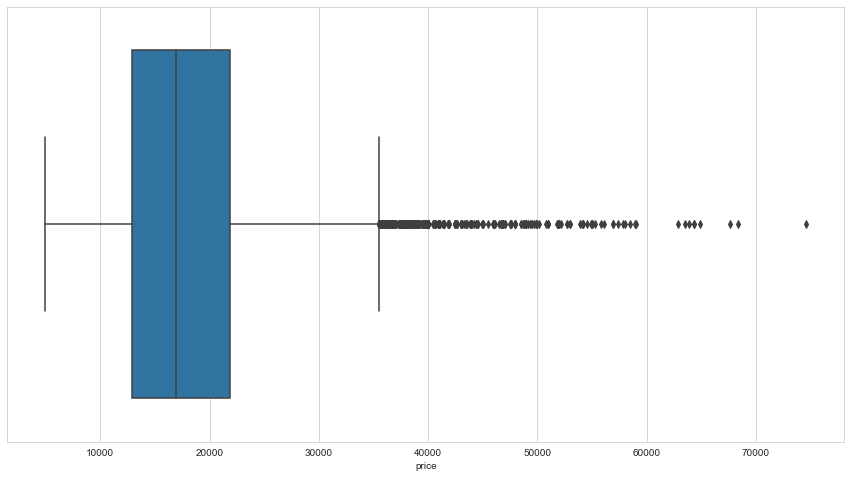

In [128]:
plt.figure (figsize=(15,8))
sns.boxplot(x=df['price']);

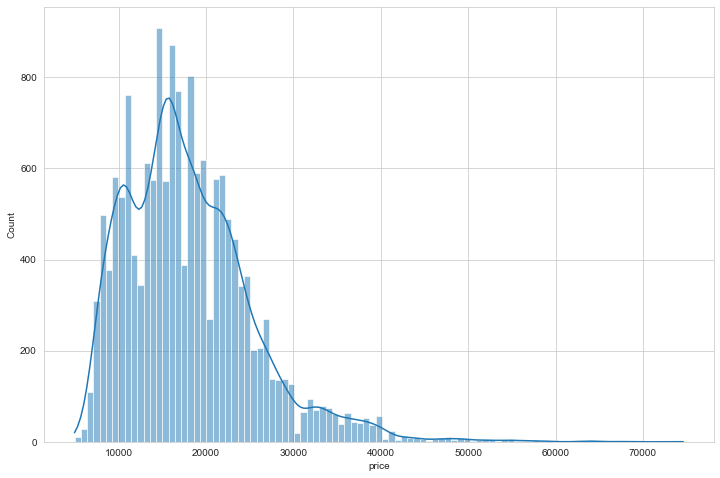

In [129]:
plt.figure(figsize=(12,8))
sns.histplot(x = df['price'], kde=True);

# COLUMN-4 vat (DONE)

In [130]:
first_looking('vat')

column name    :  vat
--------------------------------
per_of_nulls   :  % 28.35
num_of_nulls   :  4513
num_of_uniques :  2
VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64


In [131]:
df['vat'].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [132]:
df['vat'].isnull().sum()

4513

In [133]:
# There are two kinds of data in the 'VAT' column. VAT deductible or price negotiable. 
# Therefore these must be related to each other and data. 
# The relevance is that both of them can be subject to a discount according to the selling price of the car.
# We combined VAT deductible and price negotiable values under one heading as YES deduction/negotiation.
# We assigned NO deduction/negotiation value to 'nan' values.

In [134]:
df['vat'].replace(['VAT deductible', 'Price negotiable'], 'YES deduction/negotiation', inplace=True)

In [135]:
df['vat'].value_counts(dropna=False)

YES deduction/negotiation    11406
NaN                           4513
Name: vat, dtype: int64

In [136]:
df['vat'].fillna('NO deduction/negotiation', inplace=True)

In [137]:
df['vat'].value_counts(dropna=False)

YES deduction/negotiation    11406
NO deduction/negotiation      4513
Name: vat, dtype: int64

# COLUMN-5 km (DONE)

In [138]:
first_looking('km')

column name    :  km
--------------------------------
per_of_nulls   :  % 6.43
num_of_nulls   :  1024
num_of_uniques :  6689
10.000        1045
NaN           1024
1.000          367
5.000          170
50.000         148
              ... 
160542.000       1
20719.000        1
91910.000        1
39860.000        1
57889.000        1
Name: km, Length: 6690, dtype: int64


In [139]:
df['km'].value_counts(dropna=False)

10.000        1045
NaN           1024
1.000          367
5.000          170
50.000         148
              ... 
160542.000       1
20719.000        1
91910.000        1
39860.000        1
57889.000        1
Name: km, Length: 6690, dtype: int64

In [140]:
df['km'].isnull().sum()

1024

In [141]:
# There is no other column other than the 'age' column that I can use to fill in the km information of the vehicle. 
# By taking the average km of the vehicles according to their ages, we filled the 'NaN' values with these average 
# values with the help of transform.

In [142]:
df.groupby('age').km.mean()

age
0.000    1652.839
1.000   18036.175
2.000   41745.068
3.000   77452.500
Name: km, dtype: float64

In [143]:
transformed_km = df.groupby('age')['km'].transform('mean')

In [144]:
df['km'].fillna(transformed_km, inplace=True)

In [145]:
df['km'].value_counts(dropna=False)

10.000        1045
1652.839       985
1.000          367
5.000          170
50.000         148
              ... 
26217.000        1
160542.000       1
20719.000        1
91910.000        1
57889.000        1
Name: km, Length: 6692, dtype: int64

# COLUMN-6 registration (DROP)

In [146]:
first_looking('registration')

column name    :  registration
--------------------------------
per_of_nulls   :  % 10.03
num_of_nulls   :  1597
num_of_uniques :  4
2018.000    4522
2016.000    3674
2017.000    3273
2019.000    2853
NaN         1597
Name: registration, dtype: int64


# COLUMN-7 prev_owner (DROP)

In [147]:
first_looking('prev_owner')

column name    :  prev_owner
--------------------------------
per_of_nulls   :  % 41.87
num_of_nulls   :  6665
num_of_uniques :  5
1.000    8294
NaN      6665
2.000     778
0.000     163
3.000      17
4.000       2
Name: prev_owner, dtype: int64


In [148]:
df['prev_owner'].value_counts(dropna=False)

1.000    8294
NaN      6665
2.000     778
0.000     163
3.000      17
4.000       2
Name: prev_owner, dtype: int64

In [149]:
df['prev_owner'].isnull().sum()

6665

In [150]:
#Step-1
#df["prev_owner"].fillna(method="ffill")

#Step-2
#df.loc[df["age"]==0, "prev_owner"].fillna(method="ffill")

In [151]:
#Step-3
for group in list(df["age"].unique()):
    cond = df["age"]==group
    df.loc[cond, "prev_owner"] = df.loc[cond, "prev_owner"].fillna(method="ffill").fillna(method="bfill")
df["prev_owner"] = df["prev_owner"].fillna(method="ffill").fillna(method="bfill")

In [152]:
df["prev_owner"].value_counts(dropna=False)

1.000    14260
2.000     1173
0.000      455
3.000       29
4.000        2
Name: prev_owner, dtype: int64

In [153]:
def fill_prop(df, group_col, col_name):
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [154]:
fill_prop(df, "age", "prev_owner")

Number of NaN :  0
------------------
1.000    14260
2.000     1173
0.000      455
3.000       29
4.000        2
Name: prev_owner, dtype: int64


In [155]:
df["prev_owner"].value_counts(dropna=False)

1.000    14260
2.000     1173
0.000      455
3.000       29
4.000        2
Name: prev_owner, dtype: int64

# COLUMN-30 next_inspection_year (DROP)

In [156]:
first_looking('next_inspection_year')

column name    :  next_inspection_year
--------------------------------
per_of_nulls   :  % 77.79
num_of_nulls   :  12384
num_of_uniques :  14
NaN         12384
2021.000     1601
2020.000      694
2022.000      688
2019.000      438
2023.000       47
2018.000       38
2017.000       13
2016.000        6
2001.000        5
1921.000        1
2024.000        1
1999.000        1
2014.000        1
1955.000        1
Name: next_inspection_year, dtype: int64


# COLUMN-8 inspection_new (KEEP-DONE)

In [157]:
first_looking('inspection_new')

column name    :  inspection_new
--------------------------------
per_of_nulls   :  % 75.3
num_of_nulls   :  11987
num_of_uniques :  1
NaN    11987
Yes     3932
Name: inspection_new, dtype: int64


In [158]:
df['inspection_new'].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

In [159]:
df['inspection_new'].isnull().sum()

11987

In [160]:
df['inspection_new'].fillna("-unknown", inplace=True)

In [161]:
df['inspection_new'].value_counts(dropna=False)

-unknown    11987
Yes          3932
Name: inspection_new, dtype: int64

In [162]:
df.groupby(["make_model", "body_type", "age", "inspection_new"]).price.describe()

count      mean      std  \
make_model     body_type age   inspection_new                              
Audi A1        Compact   0.000 -unknown       243.000 24206.370 3530.095   
                               Yes            134.000 22505.366 3094.131   
                         1.000 -unknown       150.000 19065.307 2836.071   
                               Yes            117.000 18002.932 2303.340   
                         2.000 -unknown       115.000 16425.670 1985.790   
...                                               ...       ...      ...   
Renault Espace Van       1.000 Yes             33.000 33000.879 3414.041   
                         2.000 -unknown       135.000 26530.896 3422.243   
                               Yes              2.000 27139.500  211.425   
                         3.000 -unknown       173.000 22125.370 3161.765   
                               Yes             30.000 21790.100 3690.171   

                                                    min       25%       50%  \
make_model     body_type age   inspection_new                                 
Audi A1        Compact   0.000 -unknown       16220.000 21435.000 23480.000   
                               Yes            14900.000 20388.000 22400.000   
                         1.000 -unknown       14500.000 16490.000 18800.000   
                               Yes            13980.000 16445.000 16900.000   
                         2.000 -unknown       10999.000 15450.000 15850.000   
...                                                 ...       ...       ...   
Renault Espace Van       1.000 Yes            29385.000 29990.000 31899.000   
                         2.000 -unknown       14600.000 24985.000 25490.000   
                               Yes            26990.000 27064.750 27139.500   
                         3.000 -unknown       12990.000 19900.000 22222.000   
                               Yes            12614.000 19085.000 21982.500   

                                                    75%       max  
make_model     body_type age   inspection_new                      
Audi A1        Compact   0.000 -unknown       27390.000 31990.000  
                               Yes            22942.250 29197.000  
                         1.000 -unknown       21949.750 23777.000  
                               Yes            19988.000 23829.000  
                         2.000 -unknown       16890.000 22150.000  
...                                                 ...       ...  
Renault Espace Van       1.000 Yes            35300.000 38990.000  
                         2.000 -unknown       28500.000 33800.000  
                               Yes            27214.250 27289.000  
                         3.000 -unknown       24500.000 27900.000  
                               Yes            24825.000 26970.000  

[239 rows x 8 columns]

In [163]:
df['inspection_new'].replace('-unknown', np.nan, inplace=True)

In [164]:
df['inspection_new'].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

In [165]:
# Aracın ilk alımından itibaren 3 yıl sonra muayeneye gireceği düşüncesiyle;
# 0 yaşındaki araçlara Inspection new YES
# 1 yaşındaki araçlara Inspection new YES
# 2 yaşındaki araçlara Inspection new NO
# 3 yaşındaki araçlara Inspection new YES girildi.

# Next Inspection NULL

In [166]:
df[(df['inspection_new'].isnull()) & (df['next_inspection_year'].isnull())][['inspection_new','next_inspection_year','registration', 'age']]

,inspection_new,next_inspection_year,registration,age
1,NaN,NaN,2017.000,2.000
2,NaN,NaN,2016.000,3.000
3,NaN,NaN,2016.000,3.000
5,NaN,NaN,2016.000,3.000
9,NaN,NaN,2017.000,2.000
...,...,...,...,...
15911,NaN,NaN,2019.000,0.000
15912,NaN,NaN,NaN,0.000
15913,NaN,NaN,2019.000,0.000
15914,NaN,NaN,NaN,0.000


In [167]:
# We change the inspection new column values of vehicles with age 0 and Next Inspection NULL to YES.

df.loc[((df['inspection_new'].isnull()) & (df['age']==0) & (df['next_inspection_year'].isnull())), 'inspection_new']='Yes'

In [168]:
df['inspection_new'].value_counts(dropna=False)

NaN    9359
Yes    6560
Name: inspection_new, dtype: int64

In [169]:
# We change the inspection new column values of vehicles with age 1.0 and Next Inspection NULL to YES.

df.loc[((df['inspection_new'].isnull()) & (df['age']==1) & (df['next_inspection_year'].isnull())), 'inspection_new']='Yes'

In [170]:
df['inspection_new'].value_counts(dropna=False)

Yes    8967
NaN    6952
Name: inspection_new, dtype: int64

In [171]:
# We change the inspection new column values of vehicles with age 2.0 and Next Inspection NULL to NO.

df.loc[((df['inspection_new'].isnull()) & (df['age']==2) & (df['next_inspection_year'].isnull())), 'inspection_new']='No'

In [172]:
df['inspection_new'].value_counts(dropna=False)

Yes    8967
NaN    4816
No     2136
Name: inspection_new, dtype: int64

In [173]:
# We change the inspection new column values of vehicles with age 3.0 and Next Inspection NULL to YES.

df.loc[((df['inspection_new'].isnull()) & (df['age']==3) & (df['next_inspection_year'].isnull())), 'inspection_new']='Yes'

In [174]:
df['inspection_new'].value_counts(dropna=False)

Yes    11123
NaN     2660
No      2136
Name: inspection_new, dtype: int64

In [175]:
df[(df['inspection_new'].isnull()) & (df['next_inspection_year'].notnull())][['inspection_new','next_inspection_year','registration', 'age']]

,inspection_new,next_inspection_year,registration,age
8,NaN,2020.000,2016.000,3.000
12,NaN,2019.000,2016.000,3.000
14,NaN,2019.000,2016.000,3.000
15,NaN,2020.000,2016.000,3.000
18,NaN,2020.000,2016.000,3.000
...,...,...,...,...
15867,NaN,2023.000,2019.000,0.000
15870,NaN,2022.000,2019.000,0.000
15873,NaN,2023.000,2019.000,0.000
15905,NaN,2022.000,2019.000,0.000


In [176]:
# Considering that we are in 2019, we set the Inspection new values of those whose 'Next Inspection_year' value is 
# 2019 and 2020 to NO.

In [177]:
df.loc[((df['inspection_new'].isnull()) & (df['next_inspection_year']==2019)), 'inspection_new']='No'

In [178]:
df.loc[((df['inspection_new'].isnull()) & (df['next_inspection_year']==2020)), 'inspection_new']='No'

In [179]:
df['inspection_new'].value_counts(dropna=False)

Yes    11123
No      3081
NaN     1715
Name: inspection_new, dtype: int64

In [180]:
# Considering that we are in 2019, we set the Inspection new values of those whose 'Next Inspection_year' value is 
# 2021, 2022 as YES.

In [181]:
df.loc[((df['inspection_new'].isnull()) & (df['next_inspection_year']==2021)), 'inspection_new']='Yes'

In [182]:
df.loc[((df['inspection_new'].isnull()) & (df['next_inspection_year']==2022)), 'inspection_new']='Yes'

In [183]:
# Considering that the Next Inspection_year values (2023-2024) are entered incorrectly.
# Because of this reason we will fill these values according to vehicle's age. As seen below, age values are mostly consist of 0.
# Given the data was collected in 2019 the value of 2019 in registration column represents the cars as brand new.
# So they are supposed to be inspected in 2022 again. For the year 2023 and 2024 their inspection_new value should be set as NEW.

In [184]:
df[(df['next_inspection_year'] >= 2023)][['inspection_new', 'next_inspection_year', 'registration', 'age']]

,inspection_new,next_inspection_year,registration,age
2035,NaN,2023.000,2019.000,0.000
2094,NaN,2023.000,2019.000,0.000
2532,NaN,2023.000,2019.000,0.000
2533,NaN,2023.000,2019.000,0.000
2596,NaN,2023.000,2019.000,0.000
5167,NaN,2023.000,NaN,0.000
5360,NaN,2023.000,2019.000,0.000
5444,NaN,2023.000,2019.000,0.000
7635,NaN,2023.000,2019.000,0.000
7638,NaN,2023.000,2019.000,0.000


In [185]:
df.loc[((df['inspection_new'].isnull()) & (df['next_inspection_year']==2023)), 'inspection_new']='Yes'

In [186]:
df.loc[((df['inspection_new'].isnull()) & (df['next_inspection_year']==2024)), 'inspection_new']='Yes'

In [187]:
df['inspection_new'].value_counts(dropna=False)

Yes    12787
No      3081
NaN       51
Name: inspection_new, dtype: int64

In [188]:
df[df['inspection_new'].isnull()][['inspection_new', 'next_inspection_year', 'registration', 'age']]

,inspection_new,next_inspection_year,registration,age
864,NaN,2018.000,2017.000,2.000
1169,NaN,1999.000,2017.000,2.000
1304,NaN,2018.000,2017.000,2.000
1881,NaN,2018.000,2018.000,1.000
2625,NaN,2018.000,2017.000,2.000
2752,NaN,2018.000,2016.000,3.000
2802,NaN,2018.000,2017.000,2.000
2803,NaN,2018.000,2017.000,2.000
2948,NaN,2018.000,2016.000,3.000
2966,NaN,2018.000,2016.000,3.000


In [189]:
# When cross-checking the remaining 'Inspection new' column NULL values with other columns, we fill these values as NO, 
# considering that the Next Inspection_year values are entered incorrectly or that the inspection dates may have passed.
# Because of this reason we will fill these values according to vehicle's age.

In [190]:
df[(df['next_inspection_year'] < 2019) & (df['inspection_new']=='No')][['inspection_new', 'next_inspection_year', 'registration', 'age']]

,inspection_new,next_inspection_year,registration,age


In [191]:
df[(df['next_inspection_year'] < 2019) & (df['inspection_new']=='Yes')][['inspection_new', 'next_inspection_year', 'registration', 'age']]

,inspection_new,next_inspection_year,registration,age
812,Yes,2018.000,2017.000,2.000
6674,Yes,2001.000,2018.000,1.000
6748,Yes,2018.000,2017.000,2.000
7155,Yes,2001.000,2018.000,1.000
7381,Yes,2018.000,2018.000,1.000
7837,Yes,2001.000,2019.000,0.000
7893,Yes,2001.000,2019.000,0.000
9325,Yes,2018.000,2018.000,1.000
11330,Yes,2018.000,2017.000,2.000
11436,Yes,2018.000,2017.000,2.000


In [192]:
# 2024 tarihli araçlar için de age bilgisini al ve doldur.

In [193]:
df.loc[((df['inspection_new'].isnull()) & (df['age']==0) & (df['next_inspection_year'].notnull())), 'inspection_new']='Yes'

In [194]:
df.loc[((df['inspection_new'].isnull()) & (df['age']==1) & (df['next_inspection_year'].notnull())), 'inspection_new']='Yes'

In [195]:
df.loc[((df['inspection_new'].isnull()) & (df['age']==2) & (df['next_inspection_year'].notnull())), 'inspection_new']='No'

In [196]:
df.loc[((df['inspection_new'].isnull()) & (df['age']==3) & (df['next_inspection_year'].notnull())), 'inspection_new']='Yes'

In [197]:
df['inspection_new'].value_counts(dropna=False)

Yes    12818
No      3101
Name: inspection_new, dtype: int64

# COLUMN-11 body_color_original (DROP)

In [198]:
first_looking('body_color_original')

column name    :  body_color_original
--------------------------------
per_of_nulls   :  % 23.71
num_of_nulls   :  3774
num_of_uniques :  1926
NaN                       3774
Onyx Schwarz               338
Bianco                     282
Mythosschwarz Metallic     238
Brillantschwarz            216
                          ... 
Bianco avorio perlato        1
Licht wit parelmoer          1
karbonschwarz graphit        1
amethyst-schwarz             1
Quartz Grau                  1
Name: body_color_original, Length: 1927, dtype: int64


# COLUMN-9 body_color (DONE)

In [199]:
first_looking('body_color')

column name    :  body_color
--------------------------------
per_of_nulls   :  % 3.75
num_of_nulls   :  597
num_of_uniques :  14
Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64


In [200]:
df['body_color'].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

In [201]:
df['body_color'].isnull().sum()

597

In [202]:
# We cross-check the 'Null' values in the 'body_color' column with the values in the 'body_color_original' column. 
# If the colors in 'body_color' column have equivalents in the 'body_color_original' column, 
# we will fill the 'Null' values with them.

df[(df['body_color'].isnull()) & (df['body_color_original'].notnull())][['body_color', 'body_color_original']].sample(50)

,body_color,body_color_original
12703,NaN,Metallic o. Uni (wählbar)
5405,NaN,Other
13007,NaN,Metallic o. Uni (wählbar)
14140,NaN,Metallic o. Uni (wählbar)
4471,NaN,gletscherweiÃŸ
13864,NaN,Gris Titanium (KPN)
12709,NaN,Metallic o. Uni (wählbar)
7916,NaN,wählbar - ggf. mit Aufpreis
12917,NaN,wählbar - ggf. mit Aufpreis
3709,NaN,wählbar


In [203]:
df[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('Black', case=True, regex=True))][['body_color', 'body_color_original']]

,body_color,body_color_original


In [204]:
df[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('Grey', case=True, regex=True))][['body_color', 'body_color_original']]

,body_color,body_color_original
9075,NaN,Graphit Grau/Graffiti Grey
11627,NaN,GF6 Satin Steel Grey


In [205]:
df.loc[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('Grey', case=True, regex=True)), 'body_color']='Grey'

In [206]:
df[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('White', case=True, regex=True))][['body_color', 'body_color_original']]

,body_color,body_color_original
1706,NaN,Cortina White


In [207]:
df.loc[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('White', case=True, regex=True)), 'body_color']='White'

In [208]:
df[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('Silver', case=True, regex=True))][['body_color', 'body_color_original']]

,body_color,body_color_original
11591,NaN,GAN Sovereign Silver


In [209]:
df.loc[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('Silver', case=True, regex=True)), 'body_color']='Silver'

In [210]:
df[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('Blue', case=True, regex=True))][['body_color', 'body_color_original']]

,body_color,body_color_original
11620,NaN,GDX Darkmoon Blue


In [211]:
df.loc[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('Blue', case=True, regex=True)), 'body_color']='Blue'

In [212]:
df['body_color'].value_counts(dropna=False)

Black     3745
Grey      3507
White     3407
Silver    1648
Blue      1432
Red        957
NaN        592
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

In [213]:
# These are the colors in German. Let us check them and fill if there is any.

# Grau --> Grey
# WeiB --> White
# Silber --> Silver
# Schwarz --> Black
# Blau --> Blue matches.

df[(df['body_color'].isnull()) & (df['body_color_original'].notnull())][['body_color', 'body_color_original']]

,body_color,body_color_original
70,NaN,gris nano
122,NaN,wählbar
150,NaN,BLEU UTOPIA
195,NaN,BLEU UTOPIA
409,NaN,Sohobraun Metallic
...,...,...
15340,NaN,NOIR AMETHYS
15382,NaN,TEINTE CAISS
15619,NaN,wählbar - ggf gegen Aufpreis
15785,NaN,GNE NOIR ETOILE


In [214]:
df[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('Grau', case=True, regex=True))][['body_color', 'body_color_original']]

,body_color,body_color_original
8233,NaN,quarzgrau dunkel Grau metallic
8389,NaN,Licht Grau M2
12407,NaN,(Silber) - Licht Grau
12428,NaN,(Silber) - Licht Grau


In [215]:
df.loc[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('Grau', case=True, regex=True)), 'body_color']='Gray'

In [216]:
df[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('Weiß', case=True, regex=True))][['body_color', 'body_color_original']]

,body_color,body_color_original
13028,NaN,Abalone Weiß


In [217]:
df.loc[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('weiß', case=True, regex=True)), 'body_color']='White'

In [218]:
# Let us check the colors with capital letter and if there is any fill them too.

df[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('BLACK', case=True, regex=True))][['body_color', 'body_color_original']]

,body_color,body_color_original
7125,NaN,BLACK MEET KETTLE MET-4 (507B)
11479,NaN,BLACK MEET KETTLE MET-4 (507B)
11666,NaN,BLACK MEET KETTLE MET-4 (507B)


In [219]:
df.loc[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('BLACK', case=True, regex=True)), 'body_color']='Black'

In [220]:
df[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('GRAY', case=True, regex=True))][['body_color', 'body_color_original']]

,body_color,body_color_original
11882,NaN,SATIN STEEL GRAY MET-4 (501B)


In [221]:
df.loc[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('GRAY', case=True, regex=True)), 'body_color']='Gray'

In [222]:
df[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('SILVER', case=True, regex=True))][['body_color', 'body_color_original']]

,body_color,body_color_original
7150,NaN,SWITCHBLADE SILVER MET (G)
7206,NaN,SWITCHBLADE SILVER MET (G)


In [223]:
df.loc[(df['body_color'].isnull()) & (df['body_color_original'].str.contains('SILVER', case=True, regex=True)), 'body_color']='Silver'

In [224]:
df['body_color'].value_counts(dropna=False)

Black     3748
Grey      3507
White     3407
Silver    1650
Blue      1432
Red        957
NaN        582
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Gray         5
Orange       3
Gold         2
Name: body_color, dtype: int64

In [225]:
df[(df['body_color'].isnull()) & (df['body_color_original'])][['body_color', 'body_color_original']].sample(25)

,body_color,body_color_original
5582,NaN,wählbar
1611,NaN,Nanograu Metallic/Brillantschw
4516,NaN,wählbar
5479,NaN,Other
1312,NaN,Azul Utipia
5614,NaN,wählbar
12523,NaN,wählbar - ggf. mit Aufpreis
2135,NaN,Cronos / Negro Mito
14526,NaN,wählbar
12933,NaN,wählbar - ggf. mit Aufpreis


In [226]:
df['body_color'].fillna('-unknown', inplace = True)

In [227]:
df.groupby(['make_model', 'body_type', 'body_color']).price.describe()

count      mean      std       min  \
make_model     body_type body_color                                        
Audi A1        Compact   -unknown    44.000 20291.841 3456.616 15100.000   
                         Beige        6.000 20556.500 2475.512 16240.000   
                         Black      320.000 18196.281 4206.973  9950.000   
                         Blue        96.000 19145.406 4541.863 11444.000   
                         Brown        9.000 16982.000 2964.388 11445.000   
...                                     ...       ...      ...       ...   
Renault Espace Van       Brown       27.000 25718.259 9649.962 12614.000   
                         Grey       299.000 30307.204 8619.533 15500.000   
                         Silver      36.000 27373.000 4809.682 12990.000   
                         Violet      11.000 24434.273 4603.886 19900.000   
                         White      173.000 32830.312 7611.783 12990.000   

                                          25%       50%       75%       max  
make_model     body_type body_color                                          
Audi A1        Compact   -unknown   17844.000 19944.500 22020.000 29181.000  
                         Beige      19766.750 21420.000 21700.000 23250.000  
                         Black      14990.000 16890.000 21390.000 28997.000  
                         Blue       15870.000 16925.000 22226.000 28980.000  
                         Brown      15993.000 16820.000 18850.000 20750.000  
...                                       ...       ...       ...       ...  
Renault Espace Van       Brown      19225.000 22990.000 27187.500 47990.000  
                         Grey       24875.000 28140.000 34649.000 64332.000  
                         Silver     24560.000 28500.000 29900.000 35100.000  
                         Violet     20499.500 23900.000 26299.000 34990.000  
                         White      28975.000 31975.000 35975.000 64298.000  

[291 rows x 8 columns]

In [228]:
df['body_color'].replace('-unknown', np.nan, inplace=True)

In [229]:
fill(df, 'make_model', 'model_code', 'body_color', 'mode')   # ---> ffill / bfill / mode

Number of NaN :  0
------------------
Black     3899
Grey      3745
White     3547
Silver    1677
Blue      1451
Red        964
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Gray         5
Orange       3
Gold         2
Name: body_color, dtype: int64


In [230]:
df['body_color'].value_counts(dropna=False)

Black     3899
Grey      3745
White     3547
Silver    1677
Blue      1451
Red        964
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Gray         5
Orange       3
Gold         2
Name: body_color, dtype: int64

# COLUMN-10 paint_type (DONE)

In [231]:
first_looking('paint_type')

column name    :  paint_type
--------------------------------
per_of_nulls   :  % 36.26
num_of_nulls   :  5772
num_of_uniques :  3
Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64


In [232]:
df['paint_type'].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [233]:
df['paint_type'].isnull().sum()

5772

In [234]:
# We cross-check the 'Null' values in the 'paint_type' column with the values in the 'body_color_original' column. 
# If there is any macthing in the 'body_color_original' column, 
# we will fill the 'Null' values with them.

df[(df['paint_type'].isnull()) & (df['body_color_original'].notnull())][['paint_type', 'body_color_original']].sample(50)

,paint_type,body_color_original
7419,NaN,Argon Silber/Ice Silver (M2)
14236,NaN,Bianco
4198,NaN,Brillantschwarz Uni
15574,NaN,Bianco
12390,NaN,Blanco
9040,NaN,Magma rot brillant
12999,NaN,wählbar - ggf. mit Aufpreis
10618,NaN,BLANCO
1036,NaN,Gray
841,NaN,Brillantschwarz


In [235]:
df[(df['paint_type'].isnull()) & (df['body_color_original'].str.contains('Met'))][['paint_type', 'body_color_original', 'body_color']]

,paint_type,body_color_original,body_color
12180,NaN,Metallic gegen Aufpreis,Blue
12701,NaN,Metallic gegen Aufpreis,Blue
12730,NaN,Metallic gegen Aufpreis,Blue
12976,NaN,Metallic gegen Aufpreis,Blue
12990,NaN,Metallic gegen Aufpreis,Blue
13014,NaN,Metallic gegen Aufpreis,Blue
13105,NaN,Titanium Grau Met,Grey
14730,NaN,Platingrau Met,Silver
15872,NaN,Cosmos Blau Met,Blue


In [236]:
df.loc[(df['paint_type'].isnull()) & (df['body_color_original'].str.contains('Met')), 'paint_type'] = 'Metallic'

In [237]:
df[(df['paint_type'].isnull()) & (df['body_color_original'].str.contains('Uni'))][['paint_type', 'body_color_original']]

,paint_type,body_color_original
1064,NaN,Cortinaweiß Uni
1256,NaN,Cortinawit Uni
2246,NaN,Tiomangrün Uni
2343,NaN,Cortinaweiß Uni
2929,NaN,Brillantschwarz Uni
3812,NaN,Brillantschwarz Uni
3884,NaN,Brillantschwarz Uni
4006,NaN,Brilliant Schwarz Uni
4198,NaN,Brillantschwarz Uni
4394,NaN,Brillantschwarz Uni


In [238]:
df.loc[(df['paint_type'].isnull()) & (df['body_color_original'].str.contains('Uni')), 'paint_type'] = 'Uni/basic'

In [239]:
df[(df['paint_type'].isnull()) & (df['body_color_original'].str.contains('Perl'))][['paint_type', 'body_color_original']]

,paint_type,body_color_original
206,NaN,Misanorot Perleffekt
234,NaN,Misanorot Perleffekt
268,NaN,Misanorot Perleffekt
526,NaN,Misanorot Perleffekt
973,NaN,Misanorot Perleffekt
997,NaN,Misanorot Perleffekt
1074,NaN,Misanorot Perleffekt
1100,NaN,Misanorot Perleffekt
1436,NaN,Misanorot Perleffekt
1583,NaN,Daytonagrau Perleffekt


In [240]:
df.loc[(df['paint_type'].isnull()) & (df['body_color_original'].str.contains('Perl')), 'paint_type'] = 'Perl effect'

In [241]:
df['paint_type'].value_counts(dropna=False)

Metallic       9803
NaN            5718
Uni/basic       369
Perl effect      29
Name: paint_type, dtype: int64

In [242]:
df['paint_type'].fillna('-unknown', inplace = True)

In [243]:
df.groupby(['make_model', 'body_type', 'body_color', 'age', 'paint_type']).price.describe()

count      mean  \
make_model     body_type body_color age   paint_type                    
Audi A1        Compact   Beige      1.000 Metallic    6.000 20556.500   
                         Black      0.000 -unknown    5.000 21771.200   
                                          Metallic   83.000 23408.181   
                                    1.000 -unknown   29.000 17044.448   
                                          Metallic   70.000 18734.686   
...                                                     ...       ...   
Renault Espace Van       White      2.000 -unknown   16.000 26250.938   
                                          Metallic    6.000 27226.500   
                                    3.000 -unknown   14.000 20243.571   
                                          Metallic    4.000 24827.500   
                                          Uni/basic   1.000 24990.000   

                                                          std       min  \
make_model     body_type body_color age   paint_type                      
Audi A1        Compact   Beige      1.000 Metallic   2475.512 16240.000   
                         Black      0.000 -unknown   6407.284 15550.000   
                                          Metallic   2914.008 19588.000   
                                    1.000 -unknown   2073.456 14220.000   
                                          Metallic   2747.146 15100.000   
...                                                       ...       ...   
Renault Espace Van       White      2.000 -unknown   4394.926 14600.000   
                                          Metallic   1874.674 23690.000   
                                    3.000 -unknown   3654.552 12990.000   
                                          Metallic   3937.295 18990.000   
                                          Uni/basic       NaN 24990.000   

                                                           25%       50%  \
make_model     body_type body_color age   paint_type                       
Audi A1        Compact   Beige      1.000 Metallic   19766.750 21420.000   
                         Black      0.000 -unknown   17600.000 18325.000   
                                          Metallic   21390.000 22400.000   
                                    1.000 -unknown   15444.000 16500.000   
                                          Metallic   16445.000 16959.000   
...                                                        ...       ...   
Renault Espace Van       White      2.000 -unknown   24945.000 25245.000   
                                          Metallic   27064.750 27639.500   
                                    3.000 -unknown   17625.000 19195.000   
                                          Metallic   24240.000 26440.000   
                                          Uni/basic  24990.000 24990.000   

                                                           75%       max  
make_model     body_type body_color age   paint_type                      
Audi A1        Compact   Beige      1.000 Metallic   21700.000 23250.000  
                         Black      0.000 -unknown   28200.000 29181.000  
                                          Metallic   25935.000 28997.000  
                                    1.000 -unknown   18333.000 21940.000  
                                          Metallic   21562.500 23450.000  
...                                                        ...       ...  
Renault Espace Van       White      2.000 -unknown   28872.500 33285.000  
                                          Metallic   28372.500 28900.000  
                                    3.000 -unknown   23192.500 25900.000  
                                          Metallic   27027.500 27440.000  
                                          Uni/basic  24990.000 24990.000  

[1278 rows x 8 columns]

In [244]:
df['paint_type'].replace('-unknown', np.nan, inplace = True)

In [245]:
fill(df, 'make_model', 'model_code', 'paint_type', 'mode')   # ---> ffill / bfill / mode

Number of NaN :  0
------------------
Metallic       15504
Uni/basic        386
Perl effect       29
Name: paint_type, dtype: int64


In [246]:
df['paint_type'].value_counts(dropna=False)

Metallic       15504
Uni/basic        386
Perl effect       29
Name: paint_type, dtype: int64

# COLUMN-12  nr._of_doors (DONE)

In [247]:
first_looking('nr._of_doors')

column name    :  nr._of_doors
--------------------------------
per_of_nulls   :  % 1.33
num_of_nulls   :  212
num_of_uniques :  6
5.000    11575
4.000     3079
3.000      832
2.000      219
NaN        212
7.000        1
1.000        1
Name: nr._of_doors, dtype: int64


In [248]:
df['nr._of_doors'].value_counts(dropna=False)

5.000    11575
4.000     3079
3.000      832
2.000      219
NaN        212
7.000        1
1.000        1
Name: nr._of_doors, dtype: int64

In [249]:
df['nr._of_doors'].isnull().sum()

212

In [250]:
df['nr._of_doors'].value_counts(dropna=False).index.sort_values()

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 7.0, nan], dtype='float64')

In [251]:
# There are 212 Null values in the nr._of_doors column. We will fill them with the mode value in accordance with 
# the make_model, model_code and nr._of_doors columns.

In [252]:
fill(df, 'make_model', 'model_code', 'nr._of_doors', 'mode')   # ---> ffill / bfill / mode

Number of NaN :  0
------------------
5.000    11778
4.000     3083
3.000      837
2.000      219
7.000        1
1.000        1
Name: nr._of_doors, dtype: int64


In [253]:
# However, there is 2 vehicles with nr_of_doors value of 1 and 7. We will check the vehicles that have the same 
# features as these vehicles. If the nr._of_doors values are different, we will fill in according to the number of doors 
# of the vehicles with the same feature.

In [254]:
df['nr._of_doors'].value_counts(dropna=False)

5.000    11778
4.000     3083
3.000      837
2.000      219
7.000        1
1.000        1
Name: nr._of_doors, dtype: int64

In [255]:
df[df['nr._of_doors']==1][['make_model','body_type','model_code']]

,make_model,body_type,model_code
13782,Renault Clio,Compact,3333/AXS


In [256]:
df[(df['make_model']=='Renault Clio') & (df['body_type']=='Compact') & (df['model_code']=='3333/AXS')][['make_model','body_type','model_code', 'nr._of_doors']]

,make_model,body_type,model_code,nr._of_doors
13510,Renault Clio,Compact,3333/AXS,5.000
13511,Renault Clio,Compact,3333/AXS,5.000
13512,Renault Clio,Compact,3333/AXS,5.000
13517,Renault Clio,Compact,3333/AXS,5.000
13537,Renault Clio,Compact,3333/AXS,5.000
13545,Renault Clio,Compact,3333/AXS,5.000
13558,Renault Clio,Compact,3333/AXS,5.000
13567,Renault Clio,Compact,3333/AXS,4.000
13577,Renault Clio,Compact,3333/AXS,5.000
13580,Renault Clio,Compact,3333/AXS,5.000


In [257]:
df.loc[(df['nr._of_doors']==1), 'nr._of_doors'] = 5

In [258]:
df['nr._of_doors'].value_counts(dropna=False)

5.000    11779
4.000     3083
3.000      837
2.000      219
7.000        1
Name: nr._of_doors, dtype: int64

In [259]:
df[df['nr._of_doors']==7][['make_model','body_type','model_code']]

,make_model,body_type,model_code
15202,Renault Espace,Van,3333/BDQ


In [260]:
df[(df['make_model']=='Renault Espace') & (df['body_type']=='Van') & (df['model_code']=='3333/BDQ')][['make_model','body_type','model_code', 'nr._of_doors']]

,make_model,body_type,model_code,nr._of_doors
14928,Renault Espace,Van,3333/BDQ,5.000
14931,Renault Espace,Van,3333/BDQ,5.000
14932,Renault Espace,Van,3333/BDQ,5.000
14934,Renault Espace,Van,3333/BDQ,5.000
14935,Renault Espace,Van,3333/BDQ,5.000
...,...,...,...,...
15866,Renault Espace,Van,3333/BDQ,5.000
15892,Renault Espace,Van,3333/BDQ,5.000
15894,Renault Espace,Van,3333/BDQ,5.000
15896,Renault Espace,Van,3333/BDQ,5.000


In [261]:
df.loc[(df['nr._of_doors']==7), 'nr._of_doors'] = 5

In [262]:
df['nr._of_doors'].value_counts(dropna=False)

5.000    11780
4.000     3083
3.000      837
2.000      219
Name: nr._of_doors, dtype: int64

# COLUMN-13  nr._of_seats (DONE)

In [263]:
first_looking('nr._of_seats')

column name    :  nr._of_seats
--------------------------------
per_of_nulls   :  % 6.14
num_of_nulls   :  977
num_of_uniques :  6
5.000    13336
4.000     1125
NaN        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: nr._of_seats, dtype: int64


In [264]:
df['nr._of_seats'].value_counts(dropna=False)

5.000    13336
4.000     1125
NaN        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: nr._of_seats, dtype: int64

In [265]:
df['nr._of_seats'].isnull().sum()

977

In [266]:
df['nr._of_seats'].value_counts(dropna=False).index.sort_values()

Float64Index([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan], dtype='float64')

In [267]:
# There are 977 Null values in the nr._of_seats column. We will fill them with the mode value in accordance with 
# the make_model, model_code and nr._of_seats columns.

In [268]:
fill(df, 'make_model', 'model_code', 'nr._of_seats', 'mode')   # ---> ffill / bfill / mode

Number of NaN :  0
------------------
5.000    14240
4.000     1183
7.000      364
2.000      129
6.000        2
3.000        1
Name: nr._of_seats, dtype: int64


In [269]:
# However, there is 3 vehicles with nr_of_seats value of 3 and 6. We will check the vehicles that have the same 
# features as these vehicles. If the nr._of_seats values are different, we will fill in according to the number of seats 
# of the vehicles with the same feature or We will fill them with the mode value in accordance with 
# the make_model, model_code and nr._of_seats columns.

In [270]:
df['nr._of_seats'].value_counts(dropna=False)

5.000    14240
4.000     1183
7.000      364
2.000      129
6.000        2
3.000        1
Name: nr._of_seats, dtype: int64

In [271]:
df[df['nr._of_seats']==3][['make_model','body_type','model_code']]

,make_model,body_type,model_code
1636,Audi A1,Compact,0588/BCY


In [272]:
df[(df['make_model']=='Audi A1') & (df['body_type']=='Compact') & (df['model_code']=='0588/BCY')][['make_model','body_type','model_code', 'nr._of_seats']].value_counts()

make_model  body_type  model_code  nr._of_seats
Audi A1     Compact    0588/BCY    3.000           1
dtype: int64

In [273]:
df.loc[(df['nr._of_seats']==3), 'nr._of_seats'] = np.nan

In [274]:
df[df['nr._of_seats']==6][['make_model','body_type','model_code']]

,make_model,body_type,model_code
582,Audi A1,Compact,0588/BDB
15890,Renault Espace,Station wagon,3333/BKQ


In [275]:
df[(df['make_model']=='Audi A1') & (df['body_type']=='Compact') & (df['model_code']=='0588/BDB')][['make_model','body_type','model_code', 'nr._of_seats']].value_counts()

make_model  body_type  model_code  nr._of_seats
Audi A1     Compact    0588/BDB    5.000           160
                                   4.000           138
                                   6.000             1
dtype: int64

In [276]:
df[(df['make_model']=='Renault Espace') & (df['body_type']=='Station wagon') & (df['model_code']=='3333/BKQ')][['make_model','body_type','model_code', 'nr._of_seats']].value_counts()

make_model      body_type      model_code  nr._of_seats
Renault Espace  Station wagon  3333/BKQ    5.000           3
                                           7.000           3
                                           6.000           1
dtype: int64

In [277]:
df.loc[(df['nr._of_seats']==6), 'nr._of_seats'] = np.nan

In [278]:
df['nr._of_seats'].value_counts(dropna=False)

5.000    14240
4.000     1183
7.000      364
2.000      129
NaN          3
Name: nr._of_seats, dtype: int64

In [279]:
fill(df, 'make_model', 'model_code', 'nr._of_seats', 'mode')

Number of NaN :  0
------------------
5.000    14243
4.000     1183
7.000      364
2.000      129
Name: nr._of_seats, dtype: int64


In [280]:
df['nr._of_seats'].value_counts(dropna=False)

5.000    14243
4.000     1183
7.000      364
2.000      129
Name: nr._of_seats, dtype: int64

# COLUMN-14  model_code (DROP)

In [281]:
first_looking('model_code')

column name    :  model_code
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  277
0588/AYB    1467
0588/BDB     902
0035/BCL     695
3333/BDQ     547
0035/BBZ     521
            ... 
1844/AEG       1
0588/BN0       1
0035/BCA       1
3333/AJY       1
0588/AZZ       1
Name: model_code, Length: 277, dtype: int64


# COLUMN-15  gearing_type (DONE)

In [282]:
first_looking('gearing_type')

column name    :  gearing_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64


In [283]:
df['gearing_type'].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

In [284]:
df['gearing_type'].isnull().sum()

0

# COLUMN-16  cylinders

In [285]:
first_looking('cylinders')

column name    :  cylinders
--------------------------------
per_of_nulls   :  % 35.68
num_of_nulls   :  5680
num_of_uniques :  7
4.000    8105
NaN      5680
3.000    2104
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: cylinders, dtype: int64


In [286]:
df['cylinders'].value_counts(dropna=False)

4.000    8105
NaN      5680
3.000    2104
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: cylinders, dtype: int64

In [287]:
df['cylinders'].isnull().sum()

5680

In [288]:
df['cylinders'].value_counts(dropna=False).index.sort_values()

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, nan], dtype='float64')

In [289]:
# There are 5680 Null values in the cylinders column. We will fill them with the mode value in accordance with 
# the make_model, model_code and cylinders columns.

In [290]:
fill(df, 'make_model', 'model_code', 'cylinders', 'mode')

Number of NaN :  0
------------------
4.000    12458
3.000     3431
5.000       22
6.000        3
8.000        2
2.000        2
1.000        1
Name: cylinders, dtype: int64


In [291]:
df['cylinders'].value_counts(dropna=False)

4.000    12458
3.000     3431
5.000       22
6.000        3
8.000        2
2.000        2
1.000        1
Name: cylinders, dtype: int64

In [292]:
# When we examine Cylinders on the internet, we see that the cylinders of automobile-type vehicles vary between 2 and 8. 
# For this reason, it is useful to check the records with a cylinders value of 1 and a cylinders number of 1,2 v e3. 
# If a record that evaluates to false is encountered, it will be converted to Null and the make_model, model_code and
# cylinders columns will be populated according to the Mode value.

In [293]:
df[df['cylinders']==1][['make_model','body_type','model_code']]

,make_model,body_type,model_code
9956,Opel Corsa,Compact,0035/BCL


In [294]:
df[(df['make_model']=='Opel Corsa') & (df['body_type']=='Compact')][['make_model','body_type','model_code', 'cylinders']].value_counts()

make_model  body_type  model_code  cylinders
Opel Corsa  Compact    0035/BCL    4.000        437
                       0035/BBZ    4.000        212
                       0035/BCB    4.000        199
                       1844/ADJ    4.000        136
                       0035/BCJ    4.000         48
                       1844/ACP    4.000         31
                       0035/BCI    4.000         27
                       0035/BGP    4.000         23
                       1844/ACW    4.000         21
                       0035/BCR    4.000         19
                       1844/ADF    4.000         14
                       0035/BCD    4.000         13
                       0035/BCK    4.000         11
                       0035/BGR    4.000          8
                       0COR/UNN0   4.000          7
                       0COR/UNN2   3.000          6
                       0035/BCE    3.000          3
                       0035/BCH    4.000          3
                   

In [295]:
df.loc[(df['cylinders']==1), 'cylinders'] = np.nan

In [296]:
df[df['cylinders']==2][['make_model','body_type','model_code']]

,make_model,body_type,model_code
11342,Opel Insignia,Station wagon,0INS/UNN0
15835,Renault Espace,Van,3333/BKQ


In [297]:
df[(df['make_model']=='Opel Insignia') & (df['body_type']=='Station wagon')][['make_model','body_type','model_code', 'cylinders']].value_counts()

make_model     body_type      model_code  cylinders
Opel Insignia  Station wagon  0035/BFI    4.000        254
                              0035/BEJ    4.000        211
                              0035/BEL    4.000        196
                              0035/BKU    4.000        187
                              0035/BFH    4.000        180
                              0INS/UNN0   4.000        133
                              1844/AJG    4.000         70
                              0035/BKN    4.000         66
                              0035/BKT    4.000         48
                              1844/AAI    4.000         32
                              1844/AAK    4.000         30
                              0035/BFF    4.000         29
                              0035/BKY    4.000         27
                              0035/BFD    4.000         26
                              0035/BAT    4.000         19
                              0035/BAR    4.000         16
    

In [298]:
df[(df['make_model']=='Renault Espace') & (df['body_type']=='Van')][['make_model','body_type','model_code', 'cylinders']].value_counts()

make_model      body_type  model_code  cylinders
Renault Espace  Van        3333/BDQ    4.000        421
                           3333/BHJ    4.000        167
                           3333/BDP    4.000         59
                           3333/BKQ    4.000         58
                           3333/BDR    4.000         55
                           3333/BKR    4.000         24
                           3333/ABC    4.000         10
                           3333/BDJ    4.000          3
                           0ESP/UNN0   4.000          1
                           3333/006    4.000          1
                           3333/AJY    4.000          1
                           3333/BDQ    8.000          1
                           3333/BKG    4.000          1
                           3333/BKQ    2.000          1
dtype: int64

In [299]:
df.loc[(df['cylinders']==2), 'cylinders'] = np.nan

In [300]:
df[df['cylinders']==6][['make_model','body_type','model_code']]

,make_model,body_type,model_code
10771,Opel Insignia,Station wagon,0035/BFI
10826,Opel Insignia,Station wagon,0035/BFH
12897,Opel Insignia,Sedans,0035/BFG


In [301]:
df[(df['make_model']=='Opel Insignia') & (df['body_type']=='Station wagon')][['make_model','body_type','model_code', 'cylinders']].value_counts()

make_model     body_type      model_code  cylinders
Opel Insignia  Station wagon  0035/BFI    4.000        254
                              0035/BEJ    4.000        211
                              0035/BEL    4.000        196
                              0035/BKU    4.000        187
                              0035/BFH    4.000        180
                              0INS/UNN0   4.000        133
                              1844/AJG    4.000         70
                              0035/BKN    4.000         66
                              0035/BKT    4.000         48
                              1844/AAI    4.000         32
                              1844/AAK    4.000         30
                              0035/BFF    4.000         29
                              0035/BKY    4.000         27
                              0035/BFD    4.000         26
                              0035/BAT    4.000         19
                              0035/BAR    4.000         16
    

In [302]:
df[(df['make_model']=='Opel Insignia') & (df['body_type']=='Sedans')][['make_model','body_type','model_code', 'cylinders']].value_counts()

make_model     body_type  model_code  cylinders
Opel Insignia  Sedans     0035/BFH    4.000        191
                          0035/BKN    4.000        103
                          0INS/UNN0   4.000         98
                          0035/BEJ    4.000         88
                          0035/BKQ    4.000         69
                          0035/BKM    4.000         69
                          0035/BFI    4.000         44
                          0035/BFG    4.000         36
                          0035/BFD    4.000         30
                          0035/BKR    4.000         23
                          1844/AAB    4.000         22
                          1844/AJF    4.000         17
                          1844/AAA    4.000         15
                          0035/BEL    4.000         14
                          1844/AAD    4.000         12
                          0035/BKT    4.000          7
                          0035/BAT    4.000          6
                 

In [303]:
df.loc[(df['cylinders']==6), 'cylinders'] = np.nan

In [304]:
df[df['cylinders']==8][['make_model','body_type','model_code']]

,make_model,body_type,model_code
535,Audi A1,Compact,0588/BDB
15055,Renault Espace,Van,3333/BDQ


In [305]:
df[(df['make_model']=='Audi A1') & (df['body_type']=='Compact')][['make_model','body_type','model_code', 'cylinders']].value_counts()

make_model  body_type  model_code  cylinders
Audi A1     Compact    0588/BDB    3.000        296
                       0588/BNO    3.000        174
                       0588/BDF    3.000        153
                       0588/BCV    3.000         95
                       0588/BDC    4.000         89
                       0588/BNN    3.000         52
                       0588/BDG    4.000         52
                       0588/BHM    3.000         40
                       0588/BHL    3.000         22
                       0588/BDD    4.000         20
                       0588/BDA    4.000         19
                       0588/BNQ    4.000          8
                       0588/BCZ    3.000          7
                       0588/BCW    4.000          3
                       0588/BDF    4.000          2
                       0588/BDB    4.000          2
                                   8.000          1
                       0588/BHL    4.000          1
                   

In [306]:
df[(df['make_model']=='Renault Espace') & (df['body_type']=='Van')][['make_model','body_type','model_code', 'cylinders']].value_counts()

make_model      body_type  model_code  cylinders
Renault Espace  Van        3333/BDQ    4.000        421
                           3333/BHJ    4.000        167
                           3333/BDP    4.000         59
                           3333/BKQ    4.000         58
                           3333/BDR    4.000         55
                           3333/BKR    4.000         24
                           3333/ABC    4.000         10
                           3333/BDJ    4.000          3
                           0ESP/UNN0   4.000          1
                           3333/006    4.000          1
                           3333/AJY    4.000          1
                           3333/BDQ    8.000          1
                           3333/BKG    4.000          1
dtype: int64

In [307]:
df.loc[(df['cylinders']==8), 'cylinders'] = np.nan

In [308]:
# As checked above, Cylinders values 1, 2, 6 and 8 are entered incorrectly.

In [309]:
df['cylinders'].value_counts(dropna=False)

4.000    12458
3.000     3431
5.000       22
NaN          8
Name: cylinders, dtype: int64

In [310]:
fill(df, 'make_model', 'model_code', 'cylinders', 'mode')

Number of NaN :  0
------------------
4.000    12465
3.000     3432
5.000       22
Name: cylinders, dtype: int64


In [311]:
df['cylinders'].value_counts(dropna=False)

4.000    12465
3.000     3432
5.000       22
Name: cylinders, dtype: int64

# COLUMN-17  drive_chain 

In [312]:
first_looking('drive_chain')

column name    :  drive_chain
--------------------------------
per_of_nulls   :  % 43.08
num_of_nulls   :  6858
num_of_uniques :  3
front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64


In [313]:
df['drive_chain'].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [314]:
df['drive_chain'].isnull().sum()

6858

In [315]:
df['drive_chain'].fillna('-unknown', inplace=True)

In [316]:
df.groupby(['make_model', 'body_type','model_code']).price.describe()

count      mean      std       min  \
make_model     body_type model_code                                        
Audi A1        Compact   0588/BCV    95.000 16747.411 3260.352  9950.000   
                         0588/BCW     3.000 14350.000  409.268 13900.000   
                         0588/BCY     1.000 23090.000      NaN 23090.000   
                         0588/BCZ     7.000 14031.429 1187.987 12900.000   
                         0588/BDA    19.000 15730.579 2025.243 13660.000   
...                                     ...       ...      ...       ...   
Renault Espace Van       3333/BDR    55.000 26879.909 6228.522 18480.000   
                         3333/BHJ   167.000 38271.395 8159.770 20995.000   
                         3333/BKG     1.000 45990.000      NaN 45990.000   
                         3333/BKQ    59.000 43150.085 5711.206 31975.000   
                         3333/BKR    24.000 34509.833 4997.338 28890.000   

                                          25%       50%       75%       max  
make_model     body_type model_code                                          
Audi A1        Compact   0588/BCV   14970.000 16450.000 18827.500 28650.000  
                         0588/BCW   14175.000 14450.000 14575.000 14700.000  
                         0588/BCY   23090.000 23090.000 23090.000 23090.000  
                         0588/BCZ   13050.000 13350.000 15290.000 15290.000  
                         0588/BDA   14450.000 15450.000 15900.000 22940.000  
...                                       ...       ...       ...       ...  
Renault Espace Van       3333/BDR   25490.000 25490.000 26922.500 63477.000  
                         3333/BHJ   31990.000 36312.000 40999.000 64332.000  
                         3333/BKG   45990.000 45990.000 45990.000 45990.000  
                         3333/BKQ   39217.500 43911.000 47285.000 56950.000  
                         3333/BKR   31570.000 32762.500 35453.750 46760.000  

[564 rows x 8 columns]

In [317]:
df['drive_chain'].replace('-unknown', np.nan, inplace=True)

In [318]:
# There are 5680 Null values in the cylinders column. We will fill them with the mode value in accordance with 
# the make_model, model_code and cylinders columns.

In [319]:
fill(df, 'make_model', 'model_code', 'drive_chain', 'mode')

Number of NaN :  0
------------------
front    15671
4WD        244
rear         4
Name: drive_chain, dtype: int64


In [320]:
df['drive_chain'].value_counts(dropna=False)

front    15671
4WD        244
rear         4
Name: drive_chain, dtype: int64

In [321]:
# 'Rear' as a drive_chain property doesn't sound very good. Something may be wrong. 
# For this reason, it is appropriate to examine cars with a rear drive_chain value and compare them with vehicles 
# with similar or the same characteristics.

In [322]:
df[df['drive_chain']=='rear'][['make_model','body_type','model_code']]

,make_model,body_type,model_code
11031,Opel Insignia,Station wagon,0035/BFH
11456,Opel Insignia,Sedans,0035/BAJ
12089,Opel Insignia,Station wagon,1844/AAK
14611,Renault Clio,Sedans,3333/AXS


In [323]:
df[(df['make_model']=='Opel Insignia') & (df['body_type']=='Station wagon')][['make_model','body_type','model_code', 'drive_chain']].value_counts()

make_model     body_type      model_code  drive_chain
Opel Insignia  Station wagon  0035/BFI    front          255
                              0035/BEJ    front          205
                              0035/BEL    front          195
                              0035/BKU    front          187
                              0035/BFH    front          180
                              0INS/UNN0   front          124
                              1844/AJG    front           70
                              0035/BKN    front           66
                              0035/BKT    front           48
                              1844/AAI    front           32
                              1844/AAK    front           29
                              0035/BFF    front           29
                              0035/BKY    front           27
                              0035/BFD    front           26
                              0035/BAT    4WD             17
                              0

In [324]:
df[(df['make_model']=='Opel Insignia') & (df['body_type']=='Sedans')][['make_model','body_type','model_code', 'drive_chain']].value_counts()

make_model     body_type  model_code  drive_chain
Opel Insignia  Sedans     0035/BFH    front          191
                          0035/BKN    front          103
                          0INS/UNN0   front           97
                          0035/BEJ    front           88
                          0035/BKQ    front           69
                          0035/BKM    front           68
                          0035/BFI    front           44
                          0035/BFG    front           37
                          0035/BFD    front           30
                          0035/BKR    front           23
                          1844/AAB    front           22
                          1844/AJF    front           17
                          1844/AAA    front           15
                          0035/BEL    front           13
                          1844/AAD    front           12
                          0035/BKT    front            7
                          0035/BAT    

In [325]:
df[(df['make_model']=='Renault Clio') & (df['body_type']=='Sedans')][['make_model','body_type','model_code', 'drive_chain']].value_counts()

make_model    body_type  model_code  drive_chain
Renault Clio  Sedans     3333/AXS    front          194
                         3333/BAJ    front          142
                         3333/AZY    front          135
                         3333/BJR    front          131
                         3333/BEG    front           99
                         3333/BEF    front           46
                         3333/BBK    front           46
                         3333/BAD    front           42
                         3333/AXU    front           19
                         3333/AVV    front           17
                         3333/AZG    front           16
                         0CLI/UNN0   front           10
                         3333/BEG    4WD              9
                         3333/BBB    front            6
                         0CLI/UNN1   front            4
                         3333/BAN    front            4
                         3333/ABB    front            2

In [326]:
# In the examinations made above, we saw that the 'rear' values were entered incorrectly. Now we will convert them to 
# Null values and fill the make_model, model_code and drive_chain columns according to the MODE value.

In [327]:
df.loc[(df['drive_chain']=='rear'), 'drive_chain'] = np.nan

In [328]:
df['drive_chain'].value_counts(dropna=False)

front    15671
4WD        244
NaN          4
Name: drive_chain, dtype: int64

In [329]:
fill(df, 'make_model', 'model_code', 'drive_chain', 'mode')

Number of NaN :  0
------------------
front    15675
4WD        244
Name: drive_chain, dtype: int64


In [330]:
df['drive_chain'].value_counts(dropna=False)

front    15675
4WD        244
Name: drive_chain, dtype: int64

# COLUMN-18  fuel (DONE)

In [331]:
first_looking('fuel')

column name    :  fuel
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
Benzin    8545
Diesel    7299
LPG         64
Others       6
Hybrid       5
Name: fuel, dtype: int64


# COLUMN-19 co2_emission (DONE)

In [332]:
first_looking('co2_emission')

column name    :  co2_emission
--------------------------------
per_of_nulls   :  % 15.3
num_of_nulls   :  2436
num_of_uniques :  120
NaN        2436
120.000     740
99.000      545
97.000      537
104.000     501
           ... 
160.000       1
193.000       1
165.000       1
239.000       1
45.000        1
Name: co2_emission, Length: 121, dtype: int64


In [333]:
df["co2_emission"].fillna("-unknown", inplace=True)

In [334]:
df["co2_emission"].value_counts(dropna=False)

-unknown    2436
120.0        740
99.0         545
97.0         537
104.0        501
            ... 
171.0          1
184.0          1
183.0          1
181.0          1
12.324         1
Name: co2_emission, Length: 121, dtype: int64

In [335]:
df.groupby(["make_model", "body_type","co2_emission"]).price.describe()

count      mean      std       min  \
make_model     body_type co2_emission                                        
Audi A1        Compact   1.0            1.000 20881.000      NaN 20881.000   
                         9.0            1.000 12479.000      NaN 12479.000   
                         10.0         147.000 16946.871 2850.063  9950.000   
                         11.0          25.000 19960.360 2676.262 14930.000   
                         14.0           2.000 28750.000  268.701 28560.000   
...                                       ...       ...      ...       ...   
Renault Espace Van       188.0          1.000 43080.000      NaN 43080.000   
                         191.0          2.000 28465.000    0.000 28465.000   
                         193.0          1.000 38990.000      NaN 38990.000   
                         194.0          1.000 46490.000      NaN 46490.000   
                         -unknown     207.000 31073.614 8729.205 12990.000   

                                            25%       50%       75%       max  
make_model     body_type co2_emission                                          
Audi A1        Compact   1.0          20881.000 20881.000 20881.000 20881.000  
                         9.0          12479.000 12479.000 12479.000 12479.000  
                         10.0         15765.000 16450.000 18333.000 29150.000  
                         11.0         17970.000 19990.000 21460.000 28980.000  
                         14.0         28655.000 28750.000 28845.000 28940.000  
...                                         ...       ...       ...       ...  
Renault Espace Van       188.0        43080.000 43080.000 43080.000 43080.000  
                         191.0        28465.000 28465.000 28465.000 28465.000  
                         193.0        38990.000 38990.000 38990.000 38990.000  
                         194.0        46490.000 46490.000 46490.000 46490.000  
                         -unknown     24770.000 29990.000 34200.000 64332.000  

[824 rows x 8 columns]

In [336]:
df["co2_emission"].replace("-unknown", np.nan, inplace=True)

In [337]:
fill(df, 'make_model', 'model_code', 'co2_emission', 'mode')
# We will fill the missing(NaN) 'CO2 Emission' values with a reasonable correct one.
# For this purpose we could easyly benefit from mode value of same model cars, which also have similar Model Code.

Number of NaN :  0
------------------
120.000    1084
97.000      729
99.000      691
124.000     541
104.000     534
           ... 
45.000        1
51.000        1
13.983        1
1.060         1
990.000       1
Name: co2_emission, Length: 120, dtype: int64


In [338]:
df['co2_emission'].value_counts(dropna=False)

120.000    1084
97.000      729
99.000      691
124.000     541
104.000     534
           ... 
45.000        1
51.000        1
13.983        1
1.060         1
990.000       1
Name: co2_emission, Length: 120, dtype: int64

In [339]:
df['co2_emission'].unique()

array([ 99.   , 129.   , 109.   ,   9.   ,  98.   ,  97.   , 108.   ,
       105.   ,  11.   , 103.   ,  10.   ,  95.   , 104.   ,  91.   ,
        94.   , 117.   , 123.   , 106.   , 121.   , 107.   , 101.   ,
       113.   , 137.   , 100.   , 116.   , 114.   , 118.   , 331.   ,
       115.   , 119.   ,  90.   , 136.   , 134.   , 110.   , 111.   ,
       120.   ,  89.   ,  14.   , 126.   ,   1.   , 128.   , 127.   ,
       138.   ,  96.   , 130.   , 125.   ,  85.   , 124.   ,  15.   ,
        88.   , 189.   , 194.   , 149.   , 153.   , 188.   ,  36.   ,
         1.06 , 990.   , 146.   , 135.   , 158.   ,  12.087, 141.   ,
        17.   , 154.   , 150.   , 167.   , 174.   ,  93.   , 133.   ,
       131.   , 145.   , 147.   , 156.   ,  87.   ,   5.   , 148.   ,
       139.   , 151.   , 144.   , 168.   , 160.   , 170.   ,  80.   ,
        13.   , 155.   , 159.   ,   0.   , 143.   , 140.   ,   8.   ,
        12.324,  84.   , 165.   ,  51.   , 157.   , 166.   , 169.   ,
       253.   , 164.

In [340]:
df['co2_emission'].value_counts(dropna=False).index.sort_values()

Float64Index([   0.0,    1.0,   1.06,    5.0,    8.0,    9.0,   10.0,   11.0,
              12.087, 12.324,
              ...
               190.0,  191.0,  193.0,  194.0,  197.0,  199.0,  239.0,  253.0,
               331.0,  990.0],
             dtype='float64', length=120)

In [341]:
df[(df['co2_emission']<=90) | (df['co2_emission']>=190)]['co2_emission'].value_counts().sum()
# We need to decide logical min and max threshold values to correct to the wrong values
# 1909 values need to be fill reasonable values 

1909

In [342]:
df[(df['co2_emission']<=90) | (df['co2_emission']>=190)]['co2_emission'].value_counts().index
# We need to decide logical min and max threshold values to correct to the possible wrong values

Float64Index([  10.0,   85.0,    9.0,   11.0,   13.0,    1.0,   14.0,   15.0,
                90.0,    8.0,   17.0,   89.0,   88.0,  197.0,   87.0, 12.087,
                 5.0,  194.0,   36.0,  191.0,   84.0,   16.0,    0.0,  199.0,
               193.0,   45.0,   1.06, 12.324, 13.983, 14.457,  990.0,  190.0,
               239.0,  331.0,   51.0,   80.0,  253.0],
             dtype='float64')

In [343]:
df['co2_emission'].replace([10.0, 85.0, 9.0, 11.0, 13.0, 1.0, 14.0, 15.0,
                            90.0, 8.0, 17.0, 89.0, 88.0, 197.0, 87.0, 12.087,
                            5.0, 194.0, 36.0, 191.0, 84.0, 16.0, 0.0, 199.0,
                            193.0, 45.0, 1.06, 12.324, 13.983, 14.457, 990.0, 190.0,
                            239.0, 331.0, 51.0, 80.0, 253.0], np.nan, inplace=True)

In [344]:
df['co2_emission'].value_counts(dropna=False).head()
# We have now again NANs, in amount of 1909

NaN        1909
120.000    1084
97.000      729
99.000      691
124.000     541
Name: co2_emission, dtype: int64

In [345]:
fill(df, 'make_model', 'model_code', 'co2_emission', 'mode')

Number of NaN :  0
------------------
120.000    1345
97.000     1035
99.000      747
108.000     656
107.000     575
           ... 
160.000       1
181.000       1
165.000       1
184.000       1
171.000       1
Name: co2_emission, Length: 83, dtype: int64


In [346]:
df['co2_emission'].value_counts(dropna=False).index.sort_values()

Float64Index([ 91.0,  93.0,  94.0,  95.0,  96.0,  97.0,  98.0,  99.0, 100.0,
              101.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0,
              111.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0,
              121.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0,
              131.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0,
              141.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0,
              151.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0,
              161.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0,
              174.0, 175.0, 177.0, 180.0, 181.0, 183.0, 184.0, 186.0, 187.0,
              188.0, 189.0],
             dtype='float64')

# COLUMN-20 emission_class (DONE)

In [347]:
first_looking('emission_class')

column name    :  emission_class
--------------------------------
per_of_nulls   :  % 22.79
num_of_nulls   :  3628
num_of_uniques :  6
Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64


In [348]:
df['emission_class'].value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [349]:
df['emission_class'].fillna("-unknown", inplace=True)

In [350]:
# df.groupby(["make_model", "age", "fuel", "emission_class"], dropna=False).price.describe()

In [351]:
df.groupby(["make_model", "age", "fuel", "emission_class"]).price.describe()

count      mean      std  \
make_model     age   fuel   emission_class                              
Audi A1        0.000 Benzin -unknown       268.000 23747.295 3153.213   
                            Euro 6         266.000 24373.947 3245.464   
                            Euro 6d          5.000 21510.000  356.371   
                            Euro 6d-TEMP   264.000 23566.080 3664.202   
                     Diesel Euro 6           4.000 19370.000 1181.891   
...                                            ...       ...      ...   
Renault Espace 3.000 Diesel Euro 5           1.000 24900.000      NaN   
                            Euro 6         197.000 21449.437 3293.226   
                            Euro 6c          1.000 17000.000      NaN   
                            Euro 6d          1.000 17900.000      NaN   
                            Euro 6d-TEMP     3.000 22496.667 1320.997   

                                                 min       25%       50%  \
make_model     age   fuel   emission_class                                 
Audi A1        0.000 Benzin -unknown       14900.000 21850.000 22900.000   
                            Euro 6         15550.000 21800.000 24070.000   
                            Euro 6d        20990.000 21490.000 21490.000   
                            Euro 6d-TEMP   16985.000 20697.500 22490.000   
                     Diesel Euro 6         17900.000 18717.500 19495.000   
...                                              ...       ...       ...   
Renault Espace 3.000 Diesel Euro 5         24900.000 24900.000 24900.000   
                            Euro 6         12614.000 19100.000 20900.000   
                            Euro 6c        17000.000 17000.000 17000.000   
                            Euro 6d        17900.000 17900.000 17900.000   
                            Euro 6d-TEMP   21000.000 21995.000 22990.000   

                                                 75%       max  
make_model     age   fuel   emission_class                      
Audi A1        0.000 Benzin -unknown       26315.000 31990.000  
                            Euro 6         27380.000 29197.000  
                            Euro 6d        21590.000 21990.000  
                            Euro 6d-TEMP   26920.000 37900.000  
                     Diesel Euro 6         20147.500 20590.000  
...                                              ...       ...  
Renault Espace 3.000 Diesel Euro 5         24900.000 24900.000  
                            Euro 6         23990.000 30000.000  
                            Euro 6c        17000.000 17000.000  
                            Euro 6d        17900.000 17900.000  
                            Euro 6d-TEMP   23245.000 23500.000  

[248 rows x 8 columns]

In [352]:
df['emission_class'].replace("-unknown", np.nan, inplace=True)

In [353]:
df['emission_class'].value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [354]:
fill(df, 'make_model', 'model_code', 'emission_class', 'mode')
# We will fill the missing(NaN) 'Emission Class' values with a reasonable correct one.
# For this purpose we could easyly benefit from mode value of same model cars, which also have similar Model Code.

Number of NaN :  0
------------------
Euro 6          13589
Euro 6d-TEMP     2016
Euro 6c           132
Euro 5             78
Euro 6d            62
Euro 4             42
Name: emission_class, dtype: int64


In [355]:
df['emission_class'].value_counts(dropna=False)

Euro 6          13589
Euro 6d-TEMP     2016
Euro 6c           132
Euro 5             78
Euro 6d            62
Euro 4             42
Name: emission_class, dtype: int64

In [356]:
df['emission_class'].value_counts().index

Index(['Euro 6', 'Euro 6d-TEMP', 'Euro 6c', 'Euro 5', 'Euro 6d', 'Euro 4'], dtype='object')

In [357]:
df['emission_class'].replace(['Euro 6d-TEMP', 'Euro 6c', 'Euro 6d'], 'Euro 6', inplace=True )

In [358]:
df['emission_class'].value_counts(dropna=False)

Euro 6    15799
Euro 5       78
Euro 4       42
Name: emission_class, dtype: int64

# COLUMN-21  comfort_convenience (DONE)

In [359]:
first_looking('comfort_convenience')

column name    :  comfort_convenience
--------------------------------
per_of_nulls   :  % 5.78
num_of_nulls   :  920
num_of_uniques :  6198
NaN                                                                                                                                                                                                                                                                                                                                                                                           920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                            216
Air conditioning,Electrical side mirrors,Power windows                                 

In [360]:
fill(df, "make_model", 'model_code', "comfort_convenience", "mode")

Number of NaN :  0
------------------
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               219
Air conditioning,Cruise control,Electrically heated windshield,Electrical side mirrors,Heated steering wheel,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating                                                                  

In [361]:
df['comfort_convenience'].value_counts(dropna=False)

Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               219
Air conditioning,Cruise control,Electrically heated windshield,Electrical side mirrors,Heated steering wheel,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating                                                                                                        

In [362]:
df['comfort_convenience'].nunique()

6198

In [363]:
df['entertainment_media'].nunique()

346

In [364]:
df['extras'].nunique()

659

In [365]:
df['safety_security'].nunique()

4443

# COLUMN-22  entertainment_media (DONE)

In [366]:
first_looking('entertainment_media')

column name    :  entertainment_media
--------------------------------
per_of_nulls   :  % 8.63
num_of_nulls   :  1374
num_of_uniques :  346
NaN                                                                                    1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                             1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                          982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                783
On-board computer,Radio                                                                 487
                                                                                       ... 
CD player,USB                                                                             1
Digital radio,MP3,On-board computer,Radio,Sound system,USB                                1
Bluetooth,Digital radio,Hands-free equipment,Radio,Sound system,Television,USB            1
Bluetooth,CD player,Digital rad

In [367]:
fill(df, 'make_model', 'model_code', 'entertainment_media', 'mode')

Number of NaN :  0
------------------
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1723
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB              1145
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     861
On-board computer,Radio                                                      613
Radio                                                                        578
                                                                            ... 
CD player,Digital radio,Hands-free equipment,MP3,Radio                         1
Bluetooth,MP3,On-board computer,Sound system,USB                               1
Bluetooth,Digital radio,On-board computer,Sound system,USB                     1
Bluetooth,CD player,MP3                                                        1
Hands-free equipment,MP3,On-board computer,Sound system,USB                    1
Name: entertainment_media, Length: 346, dtype: int64


In [368]:
df['entertainment_media'].value_counts(dropna=False)

Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1723
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB              1145
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     861
On-board computer,Radio                                                      613
Radio                                                                        578
                                                                            ... 
CD player,Digital radio,Hands-free equipment,MP3,Radio                         1
Bluetooth,MP3,On-board computer,Sound system,USB                               1
Bluetooth,Digital radio,On-board computer,Sound system,USB                     1
Bluetooth,CD player,MP3                                                        1
Hands-free equipment,MP3,On-board computer,Sound system,USB                    1
Name: entertainment_media, Length: 346, dtype: int64

# COLUMN-23  extras (DONE)

In [369]:
first_looking('extras')

column name    :  extras
--------------------------------
per_of_nulls   :  % 18.61
num_of_nulls   :  2962
num_of_uniques :  659
Alloy wheels                                                                                                             3245
NaN                                                                                                                      2962
Alloy wheels,Touch screen                                                                                                 697
Alloy wheels,Voice Control                                                                                                577
Alloy wheels,Touch screen,Voice Control                                                                                   541
                                                                                                                         ... 
Roof rack,Ski bag,Touch screen,Trailer hitch                                                                       

In [370]:
fill(df, 'make_model', 'model_code', 'extras', 'mode')

Number of NaN :  0
------------------
Alloy wheels                                                                              5226
Alloy wheels,Touch screen                                                                  721
Alloy wheels,Voice Control                                                                 578
Alloy wheels,Touch screen,Voice Control                                                    574
Catalytic Converter                                                                        554
                                                                                          ... 
Cab or rented Car,Catalytic Converter,Voice Control                                          1
Alloy wheels,Sport package,Sport suspension,Winter tyres                                     1
Alloy wheels,Sport package,Sport seats,Trailer hitch,Voice Control                           1
Alloy wheels,Cab or rented Car,Catalytic Converter,Roof rack                                 1
Alloy wheels

In [371]:
df['extras'].value_counts(dropna=False)

Alloy wheels                                                                              5226
Alloy wheels,Touch screen                                                                  721
Alloy wheels,Voice Control                                                                 578
Alloy wheels,Touch screen,Voice Control                                                    574
Catalytic Converter                                                                        554
                                                                                          ... 
Cab or rented Car,Catalytic Converter,Voice Control                                          1
Alloy wheels,Sport package,Sport suspension,Winter tyres                                     1
Alloy wheels,Sport package,Sport seats,Trailer hitch,Voice Control                           1
Alloy wheels,Cab or rented Car,Catalytic Converter,Roof rack                                 1
Alloy wheels,Catalytic Converter,Roof rack,Sport s

# COLUMN-24  safety_security (DONE)

In [372]:
first_looking('safety_security')

column name    :  safety_security
--------------------------------
per_of_nulls   :  % 6.17
num_of_nulls   :  982
num_of_uniques :  4443
NaN                                                                                                                                                                                                                                                                                                                                                 982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                        538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure 

In [373]:
fill(df, 'make_model', 'model_code', 'safety_security', 'mode')

Number of NaN :  0
------------------
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                       742
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                  482
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction cont

In [374]:
df['safety_security'].value_counts(dropna=False)

ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                       742
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                  482
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                   

# COLUMN-25  emission_label (DONE)

In [375]:
first_looking('emission_label')

column name    :  emission_label
--------------------------------
per_of_nulls   :  % 75.22
num_of_nulls   :  11974
num_of_uniques :  5
NaN      11974
4.000     3553
1.000      381
5.000        8
3.000        2
2.000        1
Name: emission_label, dtype: int64


In [376]:
df['emission_label'].value_counts(dropna=False)

NaN      11974
4.000     3553
1.000      381
5.000        8
3.000        2
2.000        1
Name: emission_label, dtype: int64

In [377]:
df['emission_label'].isnull().sum()

11974

In [378]:
fill(df, 'make_model', 'emission_class', 'emission_label', 'mode')
# We will fill the missing(NaN) 'Emission Class' values with a reasonable correct one.
# For this purpose we could easyly benefit from mode value of same model cars, which also have similar Model Code.

Number of NaN :  0
------------------
4.000    15527
1.000      381
5.000        8
3.000        2
2.000        1
Name: emission_label, dtype: int64


In [379]:
df['emission_label'].value_counts(dropna=False)

4.000    15527
1.000      381
5.000        8
3.000        2
2.000        1
Name: emission_label, dtype: int64

# COLUMN-26 Gears (DONE)

In [380]:
first_looking('gears')

column name    :  gears
--------------------------------
per_of_nulls   :  % 29.6
num_of_nulls   :  4712
num_of_uniques :  10
6.000     5822
NaN       4712
5.000     3239
7.000     1908
8.000      224
9.000        6
4.000        2
1.000        2
3.000        2
50.000       1
2.000        1
Name: gears, dtype: int64


In [381]:
df['gears'].value_counts(dropna=False).index.sort_values()

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 50.0, nan], dtype='float64')

In [382]:
df['gears'].isnull().sum()

4712

In [383]:
# As gears information, vehicles generally have at least 5 gears, 4 forward + 1 reverse. 
# In my research on the internet, I learned that the number of gears of the vehicle can be up to 9. 
# In this case 1, 2, 3, 4 and 50 gear information is likely to be incorrect, so I replace them with Null values.

In [384]:
df['gears'].replace([1,2,3,4,50], np.nan, inplace=True)

In [385]:
df['gears'].value_counts(dropna=False).index.sort_values()

Float64Index([5.0, 6.0, 7.0, 8.0, 9.0, nan], dtype='float64')

In [386]:
df['gears'].isnull().sum()

4720

In [387]:
df[['gearing_type', 'gears']].sample(20)

,gearing_type,gears
4388,Manual,NaN
15740,Automatic,7.000
735,Manual,5.000
11513,Automatic,6.000
7587,Automatic,6.000
13010,Manual,6.000
4721,Manual,6.000
5239,Automatic,7.000
12701,Automatic,6.000
14777,Manual,NaN


In [388]:
df['gearing_type'].unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [389]:
df['gears'].unique()

array([nan,  7.,  6.,  5.,  8.,  9.])

In [390]:
df[['gearing_type', 'gears']].nunique()

gearing_type    3
gears           5
dtype: int64

In [391]:
df[(df['gears'].isna())][['model_code', 'make_model', 'short_description', 'registration','age', 'gearing_type', 'gears']]

,model_code,make_model,short_description,registration,age,gearing_type,gears
0,0588/BDF,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,2016.000,3.000,Automatic,NaN
2,0588/BDG,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,2016.000,3.000,Automatic,NaN
4,0588/BDF,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,2016.000,3.000,Automatic,NaN
5,0588/BDG,Audi A1,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,2016.000,3.000,Automatic,NaN
6,0588/BDG,Audi A1,Sportback 1.6 TDI S-TRONIC S-LINE*NAVI|XENON*,2016.000,3.000,Automatic,NaN
...,...,...,...,...,...,...,...
15906,3333/BHJ,Renault Espace,V Tce 225 EDC FAP Initiale Paris,2019.000,0.000,Automatic,NaN
15908,3333/BHJ,Renault Espace,1.8 TCe 225ch energy Initiale Paris EDC,2019.000,0.000,Automatic,NaN
15911,3333/BDQ,Renault Espace,ELYSEE ENERGY dCi 160 EDC,2019.000,0.000,Automatic,NaN
15913,3333/BHJ,Renault Espace,INITIALE Paris TCe 225 EDC GPF ACC EU6,2019.000,0.000,Automatic,NaN


In [392]:
for group1 in list(df['make_model'].unique()):
    for group2 in list(df['model_code'].unique()):
        for group3 in list(df['gearing_type'].unique()):
            cond1 = df['make_model']==group1
            cond2 = (df['make_model']==group1) & (df['model_code']==group2)
            cond3 = (df['make_model']==group1) & (df['model_code']==group2) & (df['gearing_type']==group3)
            mode1 = list(df[cond1]['gears'].mode())
            mode2 = list(df[cond2]['gears'].mode())
            mode3 = list(df[cond3]['gears'].mode())
            if mode3 != []:
                df.loc[cond3, 'gears'] = df.loc[cond3, 'gears'].fillna(df[cond3]['gears'].mode()[0])
            elif mode2 != []:
                df.loc[cond3, 'gears'] = df.loc[cond3, 'gears'].fillna(df[cond2]['gears'].mode()[0])
            elif mode1 != []:
                df.loc[cond3, 'gears'] = df.loc[cond3, 'gears'].fillna(df[cond1]['gears'].mode()[0])
            else:
                df.loc[cond3, 'gears'] = df.loc[cond3, 'gears'].fillna(df['gears'].mode()[0])

In [393]:
df['gears'].value_counts(dropna=False)

6.000    8382
5.000    4348
7.000    2864
8.000     319
9.000       6
Name: gears, dtype: int64

# COLUMN-28 hp_kw (DONE)

In [394]:
first_looking('hp_kw')

column name    :  hp_kw
--------------------------------
per_of_nulls   :  % 0.55
num_of_nulls   :  88
num_of_uniques :  80
85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
           ... 
239.000       1
115.000       1
163.000       1
4.000         1
75.000        1
Name: hp_kw, Length: 81, dtype: int64


In [395]:
df['hp_kw'].value_counts(dropna=False)

85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
           ... 
239.000       1
115.000       1
163.000       1
4.000         1
75.000        1
Name: hp_kw, Length: 81, dtype: int64

In [396]:
df['hp_kw'].isnull().sum()

88

In [397]:
df['hp_kw'].fillna('-unknown', inplace=True)

In [398]:
df.groupby(['make_model', 'model_code','hp_kw']).price.describe()

count      mean      std       min  \
make_model     model_code hp_kw                                          
Audi A1        0588/AUJ   70.000    1.000 15980.000      NaN 15980.000   
               0588/AWK   140.000   1.000 23490.000      NaN 23490.000   
               0588/BCV   60.000   16.000 14790.625 1767.490 11982.000   
                          70.000  215.000 16790.028 3161.460  9950.000   
                          85.000   34.000 24653.118 2752.874 19490.000   
...                                   ...       ...      ...       ...   
Renault Espace 3333/BKG   147.000   1.000 45990.000      NaN 45990.000   
               3333/BKQ   118.000   1.000 41390.000      NaN 41390.000   
                          146.000  17.000 39637.294 7694.281 31975.000   
                          147.000  51.000 44868.902 3977.263 35900.000   
               3333/BKR   118.000  25.000 34437.440 4905.491 28890.000   

                                        25%       50%       75%       max  
make_model     model_code hp_kw                                            
Audi A1        0588/AUJ   70.000  15980.000 15980.000 15980.000 15980.000  
               0588/AWK   140.000 23490.000 23490.000 23490.000 23490.000  
               0588/BCV   60.000  13605.000 14625.000 15622.500 19450.000  
                          70.000  14915.000 16100.000 19810.000 23777.000  
                          85.000  22397.500 25190.000 27132.500 28990.000  
...                                     ...       ...       ...       ...  
Renault Espace 3333/BKG   147.000 45990.000 45990.000 45990.000 45990.000  
               3333/BKQ   118.000 41390.000 41390.000 41390.000 41390.000  
                          146.000 33975.000 37290.000 39875.000 56950.000  
                          147.000 42495.000 44999.000 47585.000 54205.000  
               3333/BKR   118.000 31570.000 32700.000 35425.000 46760.000  

[505 rows x 8 columns]

In [399]:
df['hp_kw'].replace('-unknown', np.nan, inplace=True)

In [400]:
fill(df, 'make_model', 'model_code', 'hp_kw', 'mode')

Number of NaN :  0
------------------
85.000     2544
66.000     2122
81.000     1402
100.000    1309
110.000    1114
           ... 
4.000         1
84.000        1
137.000       1
123.000       1
75.000        1
Name: hp_kw, Length: 80, dtype: int64


In [401]:
df['hp_kw'].value_counts(dropna=False)

85.000     2544
66.000     2122
81.000     1402
100.000    1309
110.000    1114
           ... 
4.000         1
84.000        1
137.000       1
123.000       1
75.000        1
Name: hp_kw, Length: 80, dtype: int64

In [402]:
df['hp_kw'].value_counts().index.sort_values()

Float64Index([  1.0,   4.0,   9.0,  40.0,  44.0,  51.0,  52.0,  53.0,  54.0,
               55.0,  56.0,  57.0,  60.0,  63.0,  65.0,  66.0,  67.0,  70.0,
               71.0,  74.0,  75.0,  76.0,  77.0,  78.0,  80.0,  81.0,  82.0,
               84.0,  85.0,  86.0,  87.0,  88.0,  89.0,  90.0,  92.0,  93.0,
               96.0,  98.0, 100.0, 101.0, 103.0, 104.0, 110.0, 112.0, 115.0,
              117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 125.0, 127.0,
              132.0, 133.0, 135.0, 137.0, 140.0, 141.0, 143.0, 146.0, 147.0,
              149.0, 150.0, 154.0, 155.0, 162.0, 163.0, 164.0, 165.0, 167.0,
              168.0, 184.0, 191.0, 195.0, 228.0, 239.0, 270.0, 294.0],
             dtype='float64')

In [403]:
df['hp_kw'].replace(1, np.nan, inplace=True)

In [404]:
fill(df, 'make_model', 'model_code', 'hp_kw', 'mode')

Number of NaN :  0
------------------
85.000     2544
66.000     2122
81.000     1405
100.000    1313
110.000    1114
           ... 
9.000         1
133.000       1
239.000       1
115.000       1
75.000        1
Name: hp_kw, Length: 79, dtype: int64


In [405]:
df['hp_kw'].replace(4, np.nan, inplace=True)

In [406]:
fill(df, 'make_model', 'model_code', 'hp_kw', 'mode')

Number of NaN :  0
------------------
85.000     2544
66.000     2122
81.000     1405
100.000    1313
110.000    1114
           ... 
9.000         1
84.000        1
137.000       1
123.000       1
75.000        1
Name: hp_kw, Length: 78, dtype: int64


In [407]:
df['hp_kw'].replace(9, np.nan, inplace=True)

In [408]:
fill(df, 'make_model', 'model_code', 'hp_kw', 'mode')

Number of NaN :  0
------------------
85.000     2545
66.000     2122
81.000     1405
100.000    1313
110.000    1114
           ... 
163.000       1
84.000        1
137.000       1
123.000       1
75.000        1
Name: hp_kw, Length: 77, dtype: int64


In [409]:
df['hp_kw'].value_counts().index.sort_values()

Float64Index([ 40.0,  44.0,  51.0,  52.0,  53.0,  54.0,  55.0,  56.0,  57.0,
               60.0,  63.0,  65.0,  66.0,  67.0,  70.0,  71.0,  74.0,  75.0,
               76.0,  77.0,  78.0,  80.0,  81.0,  82.0,  84.0,  85.0,  86.0,
               87.0,  88.0,  89.0,  90.0,  92.0,  93.0,  96.0,  98.0, 100.0,
              101.0, 103.0, 104.0, 110.0, 112.0, 115.0, 117.0, 118.0, 119.0,
              120.0, 121.0, 122.0, 123.0, 125.0, 127.0, 132.0, 133.0, 135.0,
              137.0, 140.0, 141.0, 143.0, 146.0, 147.0, 149.0, 150.0, 154.0,
              155.0, 162.0, 163.0, 164.0, 165.0, 167.0, 168.0, 184.0, 191.0,
              195.0, 228.0, 239.0, 270.0, 294.0],
             dtype='float64')

# COLUMN-31 warranty_month (DONE)

In [410]:
first_looking('warranty_month')

column name    :  warranty_month
--------------------------------
per_of_nulls   :  % 69.51
num_of_nulls   :  11066
num_of_uniques :  41
NaN       11066
12.000     2594
24.000     1118
60.000      401
36.000      279
48.000      149
6.000       125
72.000       59
3.000        33
23.000       11
18.000       10
20.000        7
25.000        6
2.000         5
50.000        4
26.000        4
16.000        4
19.000        3
1.000         3
4.000         3
13.000        3
34.000        3
45.000        2
14.000        2
17.000        2
11.000        2
46.000        2
28.000        2
21.000        2
22.000        2
9.000         2
30.000        1
33.000        1
56.000        1
40.000        1
7.000         1
15.000        1
8.000         1
10.000        1
49.000        1
47.000        1
65.000        1
Name: warranty_month, dtype: int64


In [411]:
df['warranty_month'].value_counts(dropna=False)

NaN       11066
12.000     2594
24.000     1118
60.000      401
36.000      279
48.000      149
6.000       125
72.000       59
3.000        33
23.000       11
18.000       10
20.000        7
25.000        6
2.000         5
50.000        4
26.000        4
16.000        4
19.000        3
1.000         3
4.000         3
13.000        3
34.000        3
45.000        2
14.000        2
17.000        2
11.000        2
46.000        2
28.000        2
21.000        2
22.000        2
9.000         2
30.000        1
33.000        1
56.000        1
40.000        1
7.000         1
15.000        1
8.000         1
10.000        1
49.000        1
47.000        1
65.000        1
Name: warranty_month, dtype: int64

In [412]:
df['warranty_month'].isnull().sum()

11066

In [413]:
df['warranty_month'].value_counts(dropna=False).index.sort_values()

Float64Index([ 1.0,  2.0,  3.0,  4.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0,
              13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0,
              24.0, 25.0, 26.0, 28.0, 30.0, 33.0, 34.0, 36.0, 40.0, 45.0, 46.0,
              47.0, 48.0, 49.0, 50.0, 56.0, 60.0, 65.0, 72.0,  nan],
             dtype='float64')

In [414]:
df['warranty_month'].fillna('-unknown', inplace=True)

In [415]:
df.groupby(['make_model', 'model_code', 'age', 'warranty_month']).price.describe()

count      mean      std  \
make_model     model_code age   warranty_month                             
Audi A1        0588/AUJ   0.000 -unknown        1.000 15980.000      NaN   
               0588/AWK   2.000 3.0             1.000 23490.000      NaN   
               0588/BCV   0.000 12.0            1.000 20980.000      NaN   
                                18.0            1.000 19995.000      NaN   
                                24.0            5.000 17534.000 2881.107   
...                                               ...       ...      ...   
Renault Espace 3333/BKR   0.000 24.0            2.000 33187.500 3164.303   
                                36.0            1.000 35540.000      NaN   
                                48.0            1.000 37550.000      NaN   
                                60.0            1.000 34980.000      NaN   
                                -unknown       20.000 34324.550 5394.646   

                                                     min       25%       50%  \
make_model     model_code age   warranty_month                                 
Audi A1        0588/AUJ   0.000 -unknown       15980.000 15980.000 15980.000   
               0588/AWK   2.000 3.0            23490.000 23490.000 23490.000   
               0588/BCV   0.000 12.0           20980.000 20980.000 20980.000   
                                18.0           19995.000 19995.000 19995.000   
                                24.0           14900.000 15550.000 15900.000   
...                                                  ...       ...       ...   
Renault Espace 3333/BKR   0.000 24.0           30950.000 32068.750 33187.500   
                                36.0           35540.000 35540.000 35540.000   
                                48.0           37550.000 37550.000 37550.000   
                                60.0           34980.000 34980.000 34980.000   
                                -unknown       28890.000 31570.000 32262.500   

                                                     75%       max  
make_model     model_code age   warranty_month                      
Audi A1        0588/AUJ   0.000 -unknown       15980.000 15980.000  
               0588/AWK   2.000 3.0            23490.000 23490.000  
               0588/BCV   0.000 12.0           20980.000 20980.000  
                                18.0           19995.000 19995.000  
                                24.0           20420.000 20900.000  
...                                                  ...       ...  
Renault Espace 3333/BKR   0.000 24.0           34306.250 35425.000  
                                36.0           35540.000 35540.000  
                                48.0           37550.000 37550.000  
                                60.0           34980.000 34980.000  
                                -unknown       34414.000 46760.000  

[1430 rows x 8 columns]

In [416]:
# There are 70% null values in the Warranty_month column. The column's null values can be filled. 
# Because it will be similar to tools with the same make_model, model_code, age, registration column's information. 
# Since the information of this column is entered by the vehicle owner, I think it would not be very appropriate to play with 
# null values. Instead, it may be more appropriate to code YES for vehicles with Warranty_month information entered, and NO for
# vehicles that are not. Or just enter 0 to the null values, leaving the others as they are.
# In addition, we will not DROP for now, since the warranty information is an important factor affecting the price.

In [417]:
df['warranty_month'] = df['warranty_month'].apply(lambda x : "no_warranty" if x == "-unknown" else "yes_warranty")

In [418]:
df['warranty_month'].value_counts()

no_warranty     11066
yes_warranty     4853
Name: warranty_month, dtype: int64

# COLUMN-32 upholstery_type (DONE)

In [419]:
first_looking('upholstery_type')

column name    :  upholstery_type
--------------------------------
per_of_nulls   :  % 23.37
num_of_nulls   :  3720
num_of_uniques :  12
Cloth           8423
NaN             3720
Part leather    1499
Full leather    1009
Black            491
Other            368
Grey             273
Velour            60
alcantara         57
Brown             12
Beige              3
White              2
Blue               2
Name: upholstery_type, dtype: int64


In [420]:
# upholstery types: alcantara, cloth, Full leather, Part leather, Velour, Other

In [421]:
df['upholstery_type'].value_counts(dropna=False)

Cloth           8423
NaN             3720
Part leather    1499
Full leather    1009
Black            491
Other            368
Grey             273
Velour            60
alcantara         57
Brown             12
Beige              3
White              2
Blue               2
Name: upholstery_type, dtype: int64

In [422]:
df['upholstery_type'].isnull().sum()

3720

In [423]:
# We cross-check the 'upholstery_type' column with the 'upholstery_color' column. 
# Because we created both columns from the 'upholstery' column. 
# In both columns, there may be a value that does not match the column content and belongs to the other column. 
# Also, one column can have 'Null' values and the other has a value that match with the other column.

In [424]:
df[['upholstery_type','upholstery_color']].value_counts()

upholstery_type  upholstery_color
Cloth            Black               5821
Part leather     Black               1121
Cloth            Cloth               1005
                 Grey                 891
                 Other                639
Full leather     Black                575
Black            Black                491
Grey             Grey                 273
Other            Other                238
Part leather     Part leather         140
Full leather     Full leather         139
                 Brown                116
Part leather     Grey                 116
Other            Black                110
Full leather     Other                 72
                 Grey                  67
Part leather     Other                 65
                 Brown                 50
alcantara        Black                 47
Velour           Black                 36
Full leather     Beige                 36
Cloth            Brown                 28
Velour           Velour                16


In [425]:
# In the 'upholstery_type' column we make 'Other' all the values that have no relation with type.

df['upholstery_type'].replace([np.nan, 'Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue'], 'Other', inplace=True )

In [426]:
df['upholstery_type'].value_counts(dropna=False)

Cloth           8423
Other           4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [427]:
# 'Other', at the 3rd stage, can be distributed to other types of upholstery by different methods.

# COLUMN-33 upholstery_color (DONE)

In [428]:
first_looking('upholstery_color')

column name    :  upholstery_color
--------------------------------
per_of_nulls   :  % 23.37
num_of_nulls   :  3720
num_of_uniques :  15
Black           8201
NaN             3720
Grey            1376
Other           1016
Cloth           1005
Brown            207
Part leather     140
Full leather     139
Beige             54
Velour            16
Blue              16
White             13
Red                9
Yellow             4
alcantara          2
Orange             1
Name: upholstery_color, dtype: int64


In [429]:
df['upholstery_color'].value_counts(dropna=False)

Black           8201
NaN             3720
Grey            1376
Other           1016
Cloth           1005
Brown            207
Part leather     140
Full leather     139
Beige             54
Velour            16
Blue              16
White             13
Red                9
Yellow             4
alcantara          2
Orange             1
Name: upholstery_color, dtype: int64

In [430]:
df['upholstery_color'].isnull().sum()

3720

In [431]:
# We cross-check the 'upholstery_color' column with the 'upholstery_type' column. 
# Because we created both columns from the 'upholstery' column. 
# In both columns, there may be a value that does not match the column content and belongs to the other column. 
# Also, one column can have 'Null' values and the other has a value that match with the other column.

In [432]:
df[['upholstery_type','upholstery_color']].value_counts()

upholstery_type  upholstery_color
Cloth            Black               5821
Part leather     Black               1121
Cloth            Cloth               1005
                 Grey                 891
                 Other                639
Other            Black                601
Full leather     Black                575
Other            Grey                 288
                 Other                238
Part leather     Part leather         140
Full leather     Full leather         139
Part leather     Grey                 116
Full leather     Brown                116
                 Other                 72
                 Grey                  67
Part leather     Other                 65
                 Brown                 50
alcantara        Black                 47
Full leather     Beige                 36
Velour           Black                 36
Cloth            Brown                 28
Velour           Velour                16
Cloth            Beige                 13


In [433]:
# In the 'upholstery_color' column we make 'Other' all the values that have no relation with color.

df['upholstery_color'].replace([np.nan, 'Cloth', 'Part leather', 'Full leather', 'Velour', 'alcantara'], 'Other', inplace=True )

In [434]:
df['upholstery_color'].value_counts(dropna=False)

Black     8201
Other     6038
Grey      1376
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64

In [435]:
# 'Other', at the 3rd stage, can be distributed to other colors of upholstery by different methods.

# COLUMN-34 displacement_cc (DONE)

In [436]:
first_looking('displacement_cc')

column name    :  displacement_cc
--------------------------------
per_of_nulls   :  % 3.12
num_of_nulls   :  496
num_of_uniques :  77
1598.000    4761
999.000     2438
1398.000    1314
1399.000     749
1229.000     677
            ... 
1368.000       1
1390.000       1
54.000         1
1856.000       1
1533.000       1
Name: displacement_cc, Length: 78, dtype: int64


In [437]:
df['displacement_cc'].value_counts(dropna=False)

1598.000    4761
999.000     2438
1398.000    1314
1399.000     749
1229.000     677
            ... 
1368.000       1
1390.000       1
54.000         1
1856.000       1
1533.000       1
Name: displacement_cc, Length: 78, dtype: int64

In [438]:
df['displacement_cc'].isnull().sum()

496

In [439]:
df['displacement_cc'].fillna('-unknown', inplace=True)

In [440]:
df.groupby(['make_model', 'model_code','displacement_cc']).price.describe()

count      mean      std  \
make_model     model_code displacement_cc                              
Audi A1        0588/AUJ   1197.0            1.000 15980.000      NaN   
               0588/AWK   -unknown          1.000 23490.000      NaN   
               0588/BCV   929.0             1.000 18880.000      NaN   
                          999.0           264.000 17673.606 4086.276   
               0588/BCW   1395.0            6.000 15340.000 2546.723   
...                                           ...       ...      ...   
Renault Espace 3333/BKG   1997.0            1.000 45990.000      NaN   
               3333/BKQ   1997.0           67.000 43522.955 5628.050   
                          -unknown          2.000 43750.000 1060.660   
               3333/BKR   1598.0            1.000 34980.000      NaN   
                          1997.0           24.000 34414.833 5009.668   

                                                min       25%       50%  \
make_model     model_code displacement_cc                                 
Audi A1        0588/AUJ   1197.0          15980.000 15980.000 15980.000   
               0588/AWK   -unknown        23490.000 23490.000 23490.000   
               0588/BCV   929.0           18880.000 18880.000 18880.000   
                          999.0            9950.000 14950.000 16850.000   
               0588/BCW   1395.0          13900.000 14105.000 14475.000   
...                                             ...       ...       ...   
Renault Espace 3333/BKG   1997.0          45990.000 45990.000 45990.000   
               3333/BKQ   1997.0          31975.000 39625.000 43911.000   
                          -unknown        43000.000 43375.000 43750.000   
               3333/BKR   1598.0          34980.000 34980.000 34980.000   
                          1997.0          28890.000 31570.000 32625.000   

                                                75%       max  
make_model     model_code displacement_cc                      
Audi A1        0588/AUJ   1197.0          15980.000 15980.000  
               0588/AWK   -unknown        23490.000 23490.000  
               0588/BCV   929.0           18880.000 18880.000  
                          999.0           20712.500 28990.000  
               0588/BCW   1395.0          14650.000 20500.000  
...                                             ...       ...  
Renault Espace 3333/BKG   1997.0          45990.000 45990.000  
               3333/BKQ   1997.0          47585.000 56950.000  
                          -unknown        44125.000 44500.000  
               3333/BKR   1598.0          34980.000 34980.000  
                          1997.0          35453.750 46760.000  

[524 rows x 8 columns]

In [441]:
df['displacement_cc'].replace('-unknown', np.nan, inplace=True)

In [442]:
# We fill 'NaN' with MODE value in accordance with the 'make_model', 'model_code' and 
# 'displacement_cc' columns.

fill(df, 'make_model', 'model_code', 'displacement_cc', 'mode')

Number of NaN :  0
------------------
1598.000    4992
999.000     2477
1398.000    1330
1399.000     758
1229.000     688
            ... 
1696.000       1
122.000        1
140.000        1
1390.000       1
1533.000       1
Name: displacement_cc, Length: 77, dtype: int64


In [443]:
df['displacement_cc'].value_counts(dropna=False)

1598.000    4992
999.000     2477
1398.000    1330
1399.000     758
1229.000     688
            ... 
1696.000       1
122.000        1
140.000        1
1390.000       1
1533.000       1
Name: displacement_cc, Length: 77, dtype: int64

In [444]:
df['displacement_cc'].value_counts().index.sort_values()

Float64Index([    1.0,     2.0,    54.0,   122.0,   139.0,   140.0,   160.0,
                890.0,   898.0,   899.0,   900.0,   929.0,   973.0,   995.0,
                996.0,   997.0,   998.0,   999.0,  1000.0,  1100.0,  1149.0,
               1195.0,  1197.0,  1198.0,  1199.0,  1200.0,  1229.0,  1239.0,
               1248.0,  1300.0,  1333.0,  1350.0,  1364.0,  1368.0,  1369.0,
               1390.0,  1395.0,  1396.0,  1397.0,  1398.0,  1399.0,  1400.0,
               1422.0,  1461.0,  1490.0,  1495.0,  1496.0,  1498.0,  1499.0,
               1500.0,  1533.0,  1568.0,  1580.0,  1584.0,  1589.0,  1596.0,
               1598.0,  1599.0,  1600.0,  1618.0,  1686.0,  1696.0,  1798.0,
               1800.0,  1856.0,  1896.0,  1956.0,  1968.0,  1984.0,  1995.0,
               1997.0,  1998.0,  2000.0,  2480.0,  2967.0, 15898.0, 16000.0],
             dtype='float64')

In [445]:
# Since we consider that values 1.0, 2.0, 54.0, 122.0, 139.0, 140.0, 160.0, 15898.0, 16000.0 are not appropriate according to displacement_cc of a vehicle, 
# we convert these values to 'NaN' values.

df['displacement_cc'].replace([1.0, 2.0, 54.0, 122.0, 139.0, 140.0, 160.0, 15898.0, 16000.0], np.nan, inplace=True)

In [446]:
# We fill the values we converted to 'NaN' with MODE value in accordance with the 'make_model', 'model_code' and 
# 'displacement_cc' columns.

fill(df, 'make_model', 'model_code', 'displacement_cc', 'mode')

Number of NaN :  0
------------------
1598.000    5023
999.000     2477
1398.000    1330
1399.000     763
1229.000     689
            ... 
1800.000       1
1350.000       1
1580.000       1
1696.000       1
1533.000       1
Name: displacement_cc, Length: 68, dtype: int64


In [447]:
df['displacement_cc'].value_counts().index.sort_values()

Float64Index([ 890.0,  898.0,  899.0,  900.0,  929.0,  973.0,  995.0,  996.0,
               997.0,  998.0,  999.0, 1000.0, 1100.0, 1149.0, 1195.0, 1197.0,
              1198.0, 1199.0, 1200.0, 1229.0, 1239.0, 1248.0, 1300.0, 1333.0,
              1350.0, 1364.0, 1368.0, 1369.0, 1390.0, 1395.0, 1396.0, 1397.0,
              1398.0, 1399.0, 1400.0, 1422.0, 1461.0, 1490.0, 1495.0, 1496.0,
              1498.0, 1499.0, 1500.0, 1533.0, 1568.0, 1580.0, 1584.0, 1589.0,
              1596.0, 1598.0, 1599.0, 1600.0, 1618.0, 1686.0, 1696.0, 1798.0,
              1800.0, 1856.0, 1896.0, 1956.0, 1968.0, 1984.0, 1995.0, 1997.0,
              1998.0, 2000.0, 2480.0, 2967.0],
             dtype='float64')

In [448]:
df['displacement_cc'].value_counts()

1598.000    5023
999.000     2477
1398.000    1330
1399.000     763
1229.000     689
            ... 
1800.000       1
1350.000       1
1580.000       1
1696.000       1
1533.000       1
Name: displacement_cc, Length: 68, dtype: int64

# COLUMN-35 weight_kg (DONE)

In [449]:
first_looking('weight_kg')

column name    :  weight_kg
--------------------------------
per_of_nulls   :  % 43.81
num_of_nulls   :  6974
num_of_uniques :  434
NaN         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
            ... 
1161.000       1
1254.000       1
1379.000       1
1575.000       1
1159.000       1
Name: weight_kg, Length: 435, dtype: int64


In [450]:
df['weight_kg'].value_counts(dropna=False)

NaN         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
            ... 
1161.000       1
1254.000       1
1379.000       1
1575.000       1
1159.000       1
Name: weight_kg, Length: 435, dtype: int64

In [451]:
df['weight_kg'].isnull().sum()

6974

In [452]:
df['weight_kg'].fillna('-unknown', inplace=True)

In [453]:
df.groupby(['make_model', 'model_code','weight_kg']).price.describe()

count      mean      std       min  \
make_model     model_code weight_kg                                       
Audi A1        0588/AUJ   -unknown   1.000 15980.000      NaN 15980.000   
               0588/AWK   1205.0     1.000 23490.000      NaN 23490.000   
               0588/BCV   1010.0     3.000 14950.000 1000.000 13950.000   
                          1035.0     1.000 15450.000      NaN 15450.000   
                          1060.0     1.000 13890.000      NaN 13890.000   
...                                    ...       ...      ...       ...   
Renault Espace 3333/BKR   1758.0     5.000 35660.000 5276.291 30950.000   
                          1780.0     1.000 37550.000      NaN 37550.000   
                          1797.0     1.000 35540.000      NaN 35540.000   
                          1833.0     7.000 31164.286 2377.498 28890.000   
                          -unknown   6.000 32550.000 1543.940 30975.000   

                                          25%       50%       75%       max  
make_model     model_code weight_kg                                          
Audi A1        0588/AUJ   -unknown  15980.000 15980.000 15980.000 15980.000  
               0588/AWK   1205.0    23490.000 23490.000 23490.000 23490.000  
               0588/BCV   1010.0    14450.000 14950.000 15450.000 15950.000  
                          1035.0    15450.000 15450.000 15450.000 15450.000  
                          1060.0    13890.000 13890.000 13890.000 13890.000  
...                                       ...       ...       ...       ...  
Renault Espace 3333/BKR   1758.0    31850.000 32700.000 41400.000 41400.000  
                          1780.0    37550.000 37550.000 37550.000 37550.000  
                          1797.0    35540.000 35540.000 35540.000 35540.000  
                          1833.0    28890.000 31570.000 32870.000 34170.000  
                          -unknown  31975.000 31975.000 32725.000 35425.000  

[1532 rows x 8 columns]

In [454]:
df['weight_kg'].replace('-unknown', np.nan, inplace=True)

In [455]:
# We fill 'NaN' with MODE value in accordance with the 'make_model', 'model_code' and 
# 'weight_kg' columns.

fill(df, 'make_model', 'model_code', 'weight_kg', 'mode')

Number of NaN :  0
------------------
1163.000    1215
1360.000     976
1135.000     627
1503.000     527
1165.000     451
            ... 
1797.000       1
1950.000       1
900.000        1
1272.000       1
1159.000       1
Name: weight_kg, Length: 434, dtype: int64


In [456]:
df['weight_kg'].value_counts().index.sort_values()

Float64Index([   1.0,  102.0,  840.0,  900.0,  977.0,  980.0, 1009.0, 1010.0,
              1017.0, 1030.0,
              ...
              2280.0, 2295.0, 2300.0, 2320.0, 2353.0, 2355.0, 2400.0, 2410.0,
              2450.0, 2471.0],
             dtype='float64', length=434)

In [457]:
# Since we consider that values 1.0 and 102.0 are not appropriate according to weight of a vehicle, 
# we convert these values to 'NaN' values.

df['weight_kg'].replace(1, np.nan, inplace=True)

In [458]:
# We fill the values we converted to 'NaN' with MODE value in accordance with the 'make_model', 'model_code' and 
# 'weight_kg' columns.

fill(df, 'make_model', 'model_code', 'weight_kg', 'mode')

Number of NaN :  0
------------------
1163.000    1215
1360.000     976
1135.000     627
1503.000     527
1165.000     451
            ... 
1797.000       1
1950.000       1
900.000        1
1272.000       1
1159.000       1
Name: weight_kg, Length: 433, dtype: int64


In [459]:
df['weight_kg'].replace(102, np.nan, inplace=True)

In [460]:
# We fill the values we converted to 'NaN' with MODE value in accordance with the 'make_model', 'model_code' and 
# 'weight_kg' columns.

fill(df, 'make_model', 'model_code', 'weight_kg', 'mode')

Number of NaN :  0
------------------
1163.000    1215
1360.000     976
1135.000     628
1503.000     527
1165.000     451
            ... 
1797.000       1
1950.000       1
900.000        1
1272.000       1
1159.000       1
Name: weight_kg, Length: 432, dtype: int64


In [461]:
df['weight_kg'].value_counts().index.sort_values()

Float64Index([ 840.0,  900.0,  977.0,  980.0, 1009.0, 1010.0, 1017.0, 1030.0,
              1035.0, 1040.0,
              ...
              2280.0, 2295.0, 2300.0, 2320.0, 2353.0, 2355.0, 2400.0, 2410.0,
              2450.0, 2471.0],
             dtype='float64', length=432)

In [462]:
df['weight_kg'].value_counts()

1163.000    1215
1360.000     976
1135.000     628
1503.000     527
1165.000     451
            ... 
1797.000       1
1950.000       1
900.000        1
1272.000       1
1159.000       1
Name: weight_kg, Length: 432, dtype: int64

# COLUMN-36 cons_comb_l/100_km (DONE)

In [463]:
first_looking('cons_comb_l/100_km')

column name    :  cons_comb_l/100_km
--------------------------------
per_of_nulls   :  % 12.77
num_of_nulls   :  2033
num_of_uniques :  72
NaN       2033
5.400      770
3.900      733
4.000      713
5.100      657
          ... 
9.100        1
7.500        1
43.000       1
46.000       1
13.800       1
Name: cons_comb_l/100_km, Length: 73, dtype: int64


In [464]:
df['cons_comb_l/100_km'].value_counts(dropna=False)

NaN       2033
5.400      770
3.900      733
4.000      713
5.100      657
          ... 
9.100        1
7.500        1
43.000       1
46.000       1
13.800       1
Name: cons_comb_l/100_km, Length: 73, dtype: int64

In [465]:
df['cons_comb_l/100_km'].isnull().sum()

2033

In [466]:
df['cons_comb_l/100_km'].fillna('-unknown', inplace=True)

In [467]:
df.groupby(['make_model', 'model_code','cons_comb_l/100_km']).price.describe()

count      mean      std  \
make_model     model_code cons_comb_l/100_km                             
Audi A1        0588/AUJ   4.2                 1.000 15980.000      NaN   
               0588/AWK   5.8                 1.000 23490.000      NaN   
               0588/BCV   4.0                 2.000 14350.000 3040.559   
                          4.2                85.000 14799.518 1776.891   
                          4.3                18.000 16187.444 1806.163   
...                                             ...       ...      ...   
Renault Espace 3333/BKR   4.7                 1.000 34980.000      NaN   
                          5.0                 2.000 33848.000 1835.649   
                          5.1                19.000 34335.263 5593.369   
                          5.6                 2.000 34170.000    0.000   
                          -unknown            1.000 37550.000      NaN   

                                                   min       25%       50%  \
make_model     model_code cons_comb_l/100_km                                 
Audi A1        0588/AUJ   4.2                15980.000 15980.000 15980.000   
               0588/AWK   5.8                23490.000 23490.000 23490.000   
               0588/BCV   4.0                12200.000 13275.000 14350.000   
                          4.2                10600.000 13430.000 14990.000   
                          4.3                13295.000 15147.500 15884.500   
...                                                ...       ...       ...   
Renault Espace 3333/BKR   4.7                34980.000 34980.000 34980.000   
                          5.0                32550.000 33199.000 33848.000   
                          5.1                28890.000 31272.500 31975.000   
                          5.6                34170.000 34170.000 34170.000   
                          -unknown           37550.000 37550.000 37550.000   

                                                   75%       max  
make_model     model_code cons_comb_l/100_km                      
Audi A1        0588/AUJ   4.2                15980.000 15980.000  
               0588/AWK   5.8                23490.000 23490.000  
               0588/BCV   4.0                15425.000 16500.000  
                          4.2                15900.000 19300.000  
                          4.3                16900.000 20980.000  
...                                                ...       ...  
Renault Espace 3333/BKR   4.7                34980.000 34980.000  
                          5.0                34497.000 35146.000  
                          5.1                35482.500 46760.000  
                          5.6                34170.000 34170.000  
                          -unknown           37550.000 37550.000  

[1300 rows x 8 columns]

In [468]:
df['cons_comb_l/100_km'].replace('-unknown', np.nan, inplace=True)

In [469]:
# We fill 'NaN' with MODE value in accordance with the 'make_model', 'model_code' and 
# 'cons_comb_l/100_km' columns.

fill(df, 'make_model', 'model_code', 'cons_comb_l/100_km', 'mode')

Number of NaN :  0
------------------
3.900     953
5.400     862
5.100     792
4.400     759
5.600     754
         ... 
1.200       1
7.500       1
9.100       1
1.000       1
55.000      1
Name: cons_comb_l/100_km, Length: 72, dtype: int64


In [470]:
df['cons_comb_l/100_km'].value_counts(dropna=False).index.sort_values()

Float64Index([ 0.0,  1.0,  1.2,  1.6,  3.0,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,
               3.7,  3.8,  3.9,  4.0,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,
               4.8,  4.9,  5.0,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,
               5.9,  6.0,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,
               7.0,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.8,  7.9,  8.0,  8.1,
               8.3,  8.6,  8.7,  9.1, 10.0, 11.0, 13.8, 32.0, 33.0, 38.0, 40.0,
              43.0, 46.0, 50.0, 51.0, 54.0, 55.0],
             dtype='float64')

In [471]:
# Since we consider that values below 3 and above 10 are not appropriate according to the amount of fuel consumption 
# per 100 kilometers, we convert these values to 'NaN' values.

df['cons_comb_l/100_km'].replace([0.0, 1.0, 1.2, 1.6, 32.0, 33.0, 38.0, 40.0, 43.0, 46.0, 50.0, 51.0, 54.0, 55.0], np.nan, inplace=True)

In [472]:
# We fill the values we converted to 'NaN' with MODE value in accordance with the 'make_model', 'model_code' and 
# 'cons_comb_l/100_km' columns.

fill(df, 'make_model', 'model_code', 'cons_comb_l/100_km', 'mode')

Number of NaN :  0
------------------
3.900     957
5.400     863
5.100     793
4.400     764
5.600     754
4.700     753
4.000     737
4.500     624
3.800     606
5.000     601
4.800     546
5.200     533
4.300     488
4.200     466
3.700     455
4.900     447
5.300     447
5.700     440
4.600     429
3.300     416
5.500     406
3.500     385
5.900     380
4.100     353
6.000     339
6.200     233
3.600     220
6.100     188
6.300     187
5.800     165
6.800     156
6.600     148
3.400     115
6.400      82
3.000      69
7.400      66
6.700      50
6.500      43
7.100      39
10.000     36
6.900      27
3.200      25
8.300      20
7.600      14
7.000      11
3.100       7
7.200       6
7.800       6
8.000       5
8.600       5
7.900       3
8.700       3
7.300       2
8.100       2
9.100       1
11.000      1
7.500       1
13.800      1
Name: cons_comb_l/100_km, dtype: int64


In [473]:
df['cons_comb_l/100_km'].value_counts(dropna=False).index.sort_values()

Float64Index([ 3.0,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4.0,
               4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5.0,  5.1,
               5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6.0,  6.1,  6.2,
               6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7.0,  7.1,  7.2,  7.3,
               7.4,  7.5,  7.6,  7.8,  7.9,  8.0,  8.1,  8.3,  8.6,  8.7,  9.1,
              10.0, 11.0, 13.8],
             dtype='float64')

# COLUMN-37 cons_city_l/100_km (DONE)

In [474]:
first_looking('cons_city_l/100_km')

column name    :  cons_city_l/100_km
--------------------------------
per_of_nulls   :  % 15.3
num_of_nulls   :  2436
num_of_uniques :  86
NaN       2436
5.000      669
5.800      633
4.500      580
4.300      533
          ... 
10.400       1
9.000        1
16.100       1
9.700        1
64.000       1
Name: cons_city_l/100_km, Length: 87, dtype: int64


In [475]:
df['cons_city_l/100_km'].value_counts(dropna=False)

NaN       2436
5.000      669
5.800      633
4.500      580
4.300      533
          ... 
10.400       1
9.000        1
16.100       1
9.700        1
64.000       1
Name: cons_city_l/100_km, Length: 87, dtype: int64

In [476]:
df['cons_city_l/100_km'].isnull().sum()

2436

In [477]:
df['cons_city_l/100_km'].fillna('-unknown', inplace=True)

In [478]:
df.groupby(['make_model', 'model_code','cons_city_l/100_km']).price.describe()

count      mean      std  \
make_model     model_code cons_city_l/100_km                             
Audi A1        0588/AUJ   5.0                 1.000 15980.000      NaN   
               0588/AWK   7.4                 1.000 23490.000      NaN   
               0588/BCV   5.0                88.000 14925.216 1796.577   
                          5.1                 3.000 16714.667 3911.671   
                          5.2                35.000 15264.800 3413.989   
...                                             ...       ...      ...   
Renault Espace 3333/BKR   5.0                 2.000 33848.000 1835.649   
                          5.1                 1.000 34980.000      NaN   
                          5.7                18.000 34268.333 5747.695   
                          6.1                 2.000 34170.000    0.000   
                          -unknown            2.000 36545.000 1421.285   

                                                   min       25%       50%  \
make_model     model_code cons_city_l/100_km                                 
Audi A1        0588/AUJ   5.0                15980.000 15980.000 15980.000   
               0588/AWK   7.4                23490.000 23490.000 23490.000   
               0588/BCV   5.0                10600.000 13475.000 15270.000   
                          5.1                13295.000 14582.000 15869.000   
                          5.2                 9950.000 12445.500 15660.000   
...                                                ...       ...       ...   
Renault Espace 3333/BKR   5.0                32550.000 33199.000 33848.000   
                          5.1                34980.000 34980.000 34980.000   
                          5.7                28890.000 31123.750 31975.000   
                          6.1                34170.000 34170.000 34170.000   
                          -unknown           35540.000 36042.500 36545.000   

                                                   75%       max  
make_model     model_code cons_city_l/100_km                      
Audi A1        0588/AUJ   5.0                15980.000 15980.000  
               0588/AWK   7.4                23490.000 23490.000  
               0588/BCV   5.0                16017.500 19300.000  
                          5.1                18424.500 20980.000  
                          5.2                16967.500 22730.000  
...                                                ...       ...  
Renault Espace 3333/BKR   5.0                34497.000 35146.000  
                          5.1                34980.000 34980.000  
                          5.7                34812.500 46760.000  
                          6.1                34170.000 34170.000  
                          -unknown           37047.500 37550.000  

[1360 rows x 8 columns]

In [479]:
df['cons_city_l/100_km'].replace('-unknown', np.nan, inplace=True)

In [480]:
# We fill 'NaN' with MODE value in accordance with the 'make_model', 'model_code' and 
# 'cons_city_l/100_km' columns.

fill(df, 'make_model', 'model_code', 'cons_city_l/100_km', 'mode')

Number of NaN :  0
------------------
5.000     860
5.100     761
5.800     716
4.500     638
4.300     599
         ... 
10.500      1
9.000       1
19.900      1
66.000      1
64.000      1
Name: cons_city_l/100_km, Length: 86, dtype: int64


In [481]:
df['cons_city_l/100_km'].value_counts(dropna=False).index.sort_values()

Float64Index([ 0.0,  1.0,  3.0,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4.0,
               4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5.0,  5.1,
               5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6.0,  6.1,  6.2,
               6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7.0,  7.1,  7.2,  7.3,
               7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8.0,  8.1,  8.2,  8.3,  8.4,
               8.5,  8.6,  8.7,  8.8,  8.9,  9.0,  9.1,  9.2,  9.4,  9.5,  9.6,
               9.7,  9.8,  9.9, 10.0, 10.1, 10.2, 10.4, 10.5, 10.8, 11.0, 11.2,
              11.3, 11.5, 16.1, 19.9, 43.0, 45.0, 62.0, 64.0, 66.0],
             dtype='float64')

In [482]:
# Since we consider that values below 3 and above 10 are not appropriate according to the amount of fuel consumption 
# per 100 kilometers, we convert these values to 'NaN' values.

df['cons_city_l/100_km'].replace([0.0, 1.0, 16.1, 19.9 , 43.0, 45.0, 62.0, 64.0, 66.0], np.nan, inplace=True)

In [483]:
# We fill the values we converted to 'NaN' with MODE value in accordance with the 'make_model', 'model_code' and 
# 'cons_city_l/100_km' columns.

fill(df, 'make_model', 'model_code', 'cons_city_l/100_km', 'mode')

Number of NaN :  0
------------------
5.000     865
5.100     761
5.800     716
4.500     638
4.300     599
         ... 
10.100      2
10.500      1
10.400      1
9.000       1
9.700       1
Name: cons_city_l/100_km, Length: 77, dtype: int64


In [484]:
df['cons_city_l/100_km'].value_counts(dropna=False).index.sort_values()

Float64Index([ 3.0,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4.0,  4.1,  4.2,
               4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5.0,  5.1,  5.2,  5.3,
               5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6.0,  6.1,  6.2,  6.3,  6.4,
               6.5,  6.6,  6.7,  6.8,  6.9,  7.0,  7.1,  7.2,  7.3,  7.4,  7.5,
               7.6,  7.7,  7.8,  7.9,  8.0,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
               8.7,  8.8,  8.9,  9.0,  9.1,  9.2,  9.4,  9.5,  9.6,  9.7,  9.8,
               9.9, 10.0, 10.1, 10.2, 10.4, 10.5, 10.8, 11.0, 11.2, 11.3,
              11.5],
             dtype='float64')

# COLUMN-38 cons_country_l/100_km (DONE)

In [485]:
first_looking('cons_country_l/100_km')

column name    :  cons_country_l/100_km
--------------------------------
per_of_nulls   :  % 14.93
num_of_nulls   :  2376
num_of_uniques :  57
NaN       2376
4.200     1178
3.700     1089
4.400      898
4.500      848
3.800      802
3.900      777
4.700      615
4.100      592
4.000      589
3.500      525
4.300      520
4.600      516
3.600      486
3.100      481
4.900      481
3.300      457
3.400      353
4.800      341
5.300      278
5.400      239
5.100      232
5.700      204
3.200      180
5.600      154
3.000      142
5.000      130
5.200      117
6.300       52
6.000       42
5.500       36
10.000      32
5.800       30
7.700       20
6.600       19
2.900       16
6.400       15
0.000        9
2.800        9
44.000       4
7.300        4
6.500        4
7.100        3
7.000        3
6.100        2
6.900        2
37.000       2
7.800        2
35.000       2
5.900        2
6.700        2
8.600        1
8.000        1
2.000        1
7.600        1
42.000       1
10.300       1
1.

In [486]:
df['cons_country_l/100_km'].value_counts(dropna=False)

NaN       2376
4.200     1178
3.700     1089
4.400      898
4.500      848
3.800      802
3.900      777
4.700      615
4.100      592
4.000      589
3.500      525
4.300      520
4.600      516
3.600      486
3.100      481
4.900      481
3.300      457
3.400      353
4.800      341
5.300      278
5.400      239
5.100      232
5.700      204
3.200      180
5.600      154
3.000      142
5.000      130
5.200      117
6.300       52
6.000       42
5.500       36
10.000      32
5.800       30
7.700       20
6.600       19
2.900       16
6.400       15
0.000        9
2.800        9
44.000       4
7.300        4
6.500        4
7.100        3
7.000        3
6.100        2
6.900        2
37.000       2
7.800        2
35.000       2
5.900        2
6.700        2
8.600        1
8.000        1
2.000        1
7.600        1
42.000       1
10.300       1
1.000        1
Name: cons_country_l/100_km, dtype: int64

In [487]:
df['cons_country_l/100_km'].isnull().sum()

2376

In [488]:
df['cons_country_l/100_km'].fillna('-unknown', inplace=True)

In [489]:
df.groupby(['make_model', 'model_code','cons_country_l/100_km']).price.describe()

count      mean      std  \
make_model     model_code cons_country_l/100_km                             
Audi A1        0588/AUJ   3.7                    1.000 15980.000      NaN   
               0588/AWK   4.9                    1.000 23490.000      NaN   
               0588/BCV   3.0                    1.000 12200.000      NaN   
                          3.7                   86.000 14938.593 1785.190   
                          3.8                   46.000 19164.370 2223.377   
...                                                ...       ...      ...   
Renault Espace 3333/BKR   4.0                    2.000 33848.000 1835.649   
                          4.4                    1.000 34980.000      NaN   
                          4.8                   18.000 34268.333 5747.695   
                          5.3                    2.000 34170.000    0.000   
                          -unknown               2.000 36545.000 1421.285   

                                                      min       25%       50%  \
make_model     model_code cons_country_l/100_km                                 
Audi A1        0588/AUJ   3.7                   15980.000 15980.000 15980.000   
               0588/AWK   4.9                   23490.000 23490.000 23490.000   
               0588/BCV   3.0                   12200.000 12200.000 12200.000   
                          3.7                   10600.000 13492.500 15270.000   
                          3.8                   13295.000 17957.500 19640.000   
...                                                   ...       ...       ...   
Renault Espace 3333/BKR   4.0                   32550.000 33199.000 33848.000   
                          4.4                   34980.000 34980.000 34980.000   
                          4.8                   28890.000 31123.750 31975.000   
                          5.3                   34170.000 34170.000 34170.000   
                          -unknown              35540.000 36042.500 36545.000   

                                                      75%       max  
make_model     model_code cons_country_l/100_km                      
Audi A1        0588/AUJ   3.7                   15980.000 15980.000  
               0588/AWK   4.9                   23490.000 23490.000  
               0588/BCV   3.0                   12200.000 12200.000  
                          3.7                   15990.000 19300.000  
                          3.8                   20700.000 23777.000  
...                                                   ...       ...  
Renault Espace 3333/BKR   4.0                   34497.000 35146.000  
                          4.4                   34980.000 34980.000  
                          4.8                   34812.500 46760.000  
                          5.3                   34170.000 34170.000  
                          -unknown              37047.500 37550.000  

[1245 rows x 8 columns]

In [490]:
df['cons_country_l/100_km'].replace('-unknown', np.nan, inplace=True)

In [491]:
# We fill 'NaN' with MODE value in accordance with the 'make_model', 'model_code' and 
# 'cons_country_l/100_km' columns.

fill(df, 'make_model', 'model_code', 'cons_country_l/100_km', 'mode')

Number of NaN :  0
------------------
3.700     1426
4.200     1375
4.400     1186
3.800     1003
4.500      980
3.900      886
3.100      679
4.700      674
4.000      643
4.900      639
4.100      622
4.600      607
3.300      580
4.300      576
3.500      560
3.600      545
3.400      372
4.800      348
5.300      317
5.600      257
5.400      246
5.700      243
5.100      238
3.200      183
3.000      142
5.000      132
5.200      120
6.300       52
6.000       42
5.500       36
10.000      33
5.800       33
2.900       31
7.700       20
6.600       19
6.400       15
0.000        9
2.800        9
7.000        5
6.500        4
7.300        4
44.000       4
7.100        3
5.900        2
35.000       2
6.100        2
6.700        2
7.800        2
37.000       2
6.900        2
8.000        1
42.000       1
7.600        1
8.600        1
2.000        1
10.300       1
1.000        1
Name: cons_country_l/100_km, dtype: int64


In [492]:
df['cons_country_l/100_km'].value_counts(dropna=False).index.sort_values()

Float64Index([ 0.0,  1.0,  2.0,  2.8,  2.9,  3.0,  3.1,  3.2,  3.3,  3.4,  3.5,
               3.6,  3.7,  3.8,  3.9,  4.0,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,
               4.7,  4.8,  4.9,  5.0,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,
               5.8,  5.9,  6.0,  6.1,  6.3,  6.4,  6.5,  6.6,  6.7,  6.9,  7.0,
               7.1,  7.3,  7.6,  7.7,  7.8,  8.0,  8.6, 10.0, 10.3, 35.0, 37.0,
              42.0, 44.0],
             dtype='float64')

In [493]:
# Since we consider that values below 3 and above 10 are not appropriate according to the amount of fuel consumption 
# per 100 kilometers, we convert these values to 'NaN' values.

df['cons_country_l/100_km'].replace([0.0, 1.0, 2.0, 35.0, 37.0, 42.0, 44.0], np.nan, inplace=True)

In [494]:
# We fill the values we converted to 'NaN' with MODE value in accordance with the 'make_model', 'model_code' and 
# 'cons_country_l/100_km' columns.

fill(df, 'make_model', 'model_code', 'cons_country_l/100_km', 'mode')

Number of NaN :  0
------------------
3.700     1435
4.200     1376
4.400     1187
3.800     1003
4.500      980
3.900      886
3.100      679
4.700      675
4.000      643
4.900      640
4.100      622
4.600      607
3.300      580
4.300      576
3.500      560
3.600      545
3.400      372
4.800      348
5.300      317
5.600      257
5.700      246
5.400      246
5.100      238
3.200      183
3.000      142
5.000      132
5.200      120
6.300       52
6.000       42
5.500       37
5.800       35
10.000      34
2.900       31
7.700       20
6.600       19
6.400       15
2.800        9
7.000        5
6.500        4
7.300        4
7.100        3
5.900        2
6.100        2
7.800        2
6.900        2
6.700        2
7.600        1
10.300       1
8.000        1
8.600        1
Name: cons_country_l/100_km, dtype: int64


In [495]:
df['cons_country_l/100_km'].value_counts(dropna=False).index.sort_values()

Float64Index([ 2.8,  2.9,  3.0,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,
               3.9,  4.0,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,
               5.0,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6.0,
               6.1,  6.3,  6.4,  6.5,  6.6,  6.7,  6.9,  7.0,  7.1,  7.3,  7.6,
               7.7,  7.8,  8.0,  8.6, 10.0, 10.3],
             dtype='float64')

In [496]:
df.shape

(15919, 39)

In [497]:
df.isnull().sum()/df.shape[0]*100

make_model               0.000
short_description        0.289
body_type                0.000
price                    0.000
vat                      0.000
km                       0.000
registration            10.032
prev_owner               0.000
inspection_new           0.000
body_color               0.000
paint_type               0.000
body_color_original     23.708
nr._of_doors             0.000
nr._of_seats             0.000
model_code               0.000
gearing_type             0.000
cylinders                0.000
drive_chain              0.000
fuel                     0.000
co2_emission             0.000
emission_class           0.000
comfort_convenience      0.000
entertainment_media      0.000
extras                   0.000
safety_security          0.000
emission_label           0.000
gears                    0.000
age                      0.000
hp_kw                    0.000
vehicle_condition        0.000
next_inspection_year    77.794
warranty_month           0.000
upholste

In [498]:
miss_val = []

[miss_val.append(i) for i in df.columns if any(df[i].isnull())]

miss_val

['short_description',
 'registration',
 'body_color_original',
 'next_inspection_year']

# COLUMNS TO DROP

In [499]:
all_columns = df.columns.to_list()

In [500]:
all_columns 

['make_model',
 'short_description',
 'body_type',
 'price',
 'vat',
 'km',
 'registration',
 'prev_owner',
 'inspection_new',
 'body_color',
 'paint_type',
 'body_color_original',
 'nr._of_doors',
 'nr._of_seats',
 'model_code',
 'gearing_type',
 'cylinders',
 'drive_chain',
 'fuel',
 'co2_emission',
 'emission_class',
 'comfort_convenience',
 'entertainment_media',
 'extras',
 'safety_security',
 'emission_label',
 'gears',
 'age',
 'hp_kw',
 'vehicle_condition',
 'next_inspection_year',
 'warranty_month',
 'upholstery_type',
 'upholstery_color',
 'displacement_cc',
 'weight_kg',
 'cons_comb_l/100_km',
 'cons_city_l/100_km',
 'cons_country_l/100_km']

In [512]:
#df.to_csv('autoscoutpart_2_before(prev_owner).csv', index = False)

In [513]:
#drop_columns = ['short_description','registration', 'body_color_original','next_inspection_year','model_code']

In [514]:
#df.drop(drop_columns, axis = 1, inplace = True)

In [515]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770.000,14500.000,14640.000,14500.000,16790.000
vat,YES deduction/negotiation,YES deduction/negotiation,YES deduction/negotiation,NO deduction/negotiation,NO deduction/negotiation
km,56013.000,80000.000,83450.000,73000.000,16200.000
prev_owner,2.000,1.000,1.000,1.000,1.000
inspection_new,Yes,No,Yes,Yes,Yes
body_color,Black,Red,Black,Brown,Black
paint_type,Metallic,Metallic,Metallic,Metallic,Metallic
nr._of_doors,5.000,3.000,4.000,3.000,5.000


In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             15919 non-null  object 
 1   body_type              15919 non-null  object 
 2   price                  15919 non-null  float64
 3   vat                    15919 non-null  object 
 4   km                     15919 non-null  float64
 5   prev_owner             15919 non-null  float64
 6   inspection_new         15919 non-null  object 
 7   body_color             15919 non-null  object 
 8   paint_type             15919 non-null  object 
 9   nr._of_doors           15919 non-null  float64
 10  nr._of_seats           15919 non-null  float64
 11  gearing_type           15919 non-null  object 
 12  cylinders              15919 non-null  float64
 13  drive_chain            15919 non-null  object 
 14  fuel                   15919 non-null  object 
 15  co

In [517]:
#df.to_csv('autoscoutpart_2(prev_owner).csv', index = False)

In [518]:
#df1 = pd.read_csv('autoscoutpart_2(prev_owner).csv') # <---> df1.to_csv("filled_scout.csv", index=False)

In [519]:
#df1.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770.000,14500.000,14640.000,14500.000,16790.000
vat,YES deduction/negotiation,YES deduction/negotiation,YES deduction/negotiation,NO deduction/negotiation,NO deduction/negotiation
km,56013.000,80000.000,83450.000,73000.000,16200.000
prev_owner,2.000,1.000,1.000,1.000,1.000
inspection_new,Yes,No,Yes,Yes,Yes
body_color,Black,Red,Black,Brown,Black
paint_type,Metallic,Metallic,Metallic,Metallic,Metallic
nr._of_doors,5.000,3.000,4.000,3.000,5.000


In [520]:
#df1.shape

(15919, 34)